# HOMEWORK1 - COMP47350
        Giuseppe Benanti, ID: 07266120

## 1 - INTRODUCTION

This notebook describes and deploys the first steps in a data analytics project that has as final goal the solution of a specific business problem.

These steps are part of the **CRISP_DM process** for data mining, specifically concerning the second and third steps (**Data Understanding** and **Data Preparation**), but also a brief summary of the first step (**Business Understanding**) is given below.

The notebook (*.ipynb* extension) is accompanied by dataset files (original *.csv* file and modified *.csv* versions), 2 PDF documents for the **Data Quality Report** and the **Data Quality Plan**, and a *requirements.txt* file listing python packages used to deploy the analyses and visualizations.

The third requirement ('*Exploring relationships between feature pairs*') is fulfilled in the final sections of this notebook.

Milestones corresponding to the solutions to the different subrequirements are indicated throughout the notebook.

## 2 - BUSINESS UNDERSTANDING

BUSINESS PROBLEM = We want to find a way to select best sellers so that their names will appear the first in the list of possible vendors for a given product, when a user checks for it. 

This increases the seller chances of selling the product, but, if the ranking method takes into account factors such as time of delivery and product cost, then it would also benefit the customer, and therefore Amazon itself.

PROPOSED ANALYTICS SOLUTION: So, in a nutshell, we want to **predict the best seller possible for a given product**, the *winner* seller that will appear the first in the list that will be displayed to the customer.

This prediction must be made based on a series of descriptive features, in order to predict a target feature describing if a seller is a *winner* for that given product or not. 

We have been given a dataset (see attached csv file *amazon-offers-10k-samples-raw.csv*) listing 10,000 entries describing offers by sellers on the Amazon platform for given products. 

## 3 - DATA UNDERSTANDING - DESCRIPTIVE STATS

### 3.1 AVAILABLE DATA

The original dataset (*amazon-offers-10k-samples-raw.csv*) has 10,000 entries describing offers by sellers for given products.

This is the **Analytics Base Table (ABT)** that will be used for the predictive analyses. We assume that the selection of these features was done with the considerations in mind of longevity, timing and availability.

Each product appears listed more than once, because many sellers can sell the same product. But only one amongst them is the *winner* seller for each product, denoted by the target feature **IsWinner**, a continuous (although binary in nature) feature that takes in only 0s and 1s (1 for *winner*).

A series of descriptive features, both continuous and categorical, describe the offers in details, including price of product, shipping details etc. These features will be used to predict the target feature.


### 3.2 FIRST LOOK AT THE DATA

Lets start looking at the data using python packages and methods for accessing and displaying parts of the original csv file dataset and some general information about the ABT.

PREPARING THE NOTEBOOK

We need to import a series of packages:

**pandas**: open source Python library for data analysis

**numpy** for numeric computing

**matplotlib.pyplot** for data visualization.

To show the plots directly on the notebook, we use the magic function:
**%matplotlib inline**.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

READING FROM csv FILE

A pandas **data frame** allows us to read and access data stored in spreadsheet (.csv) format. 

We create one data frame called 'offers' and assign to it (read into it) the data of the attached csv file *amazon-offers-10k-samples-raw.csv* using the pandas method **read_csv()**.

In [2]:
offers = pd.read_csv('amazon-offers-10k-samples-raw.csv')

To show an extract of the data frame, we simply write its name:

In [3]:
offers

,IsWinner,MarketplaceId,ProductId,TimeOfOfferChange,ConditionNotes,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,ListingCurrency,SellerFeedbackRating,...,SellerId,ShippingPrice,ShippingCurrency,ShippingTime_minHours,ShippingTime_maxHours,ShippingTime_availtype,ShipsDomestically,ShipsFromCountry,ShipsFromState,SubCondition
0,0,1.156460e+18,-4.885260e+18,2016-02-04T04:26:52.136Z,NaN,1,1,94.00,CAD,0,...,1.207140e+18,0.00,CAD,672,1008,NOW,1,NaN,NaN,new
1,1,1.156460e+18,-4.885260e+18,2016-02-04T04:26:52.136Z,Ready To Ship - We are unable to ship to PO Bo...,1,0,107.35,CAD,95,...,-1.789490e+18,0.00,CAD,48,72,NOW,1,CA,ON,new
2,0,1.156460e+18,-4.885260e+18,2016-02-04T04:26:52.136Z,.,1,0,100.46,CAD,98,...,5.452080e+18,6.99,CAD,24,48,NOW,1,CA,ON,new
3,0,1.156460e+18,-4.885260e+18,2016-02-04T04:26:52.136Z,Fast shipping in Canada.,1,0,99.24,CAD,95,...,-2.572280e+18,11.67,CAD,24,48,NOW,1,CA,ON,new
4,0,1.156460e+18,-4.885260e+18,2016-02-04T04:26:52.136Z,NaN,0,0,109.48,CAD,94,...,-8.704030e+18,8.99,CAD,24,48,NOW,1,CA,ON,new
5,0,1.156460e+18,-4.885260e+18,2016-02-04T04:26:52.136Z,NaN,0,0,116.70,CAD,67,...,1.929050e+18,6.98,CAD,24,48,NOW,1,CA,AB,new
6,0,1.156460e+18,-4.885260e+18,2016-02-04T04:26:52.136Z,*Free shipping from Canada / Livraison GRATUIT...,1,0,124.69,CAD,100,...,5.657220e+18,0.00,CAD,24,48,NOW,1,CA,ON,new
7,0,1.156460e+18,-4.885260e+18,2016-02-04T04:26:52.136Z,NaN,1,0,120.08,CAD,96,...,1.788800e+18,9.98,CAD,96,120,NOW,1,US,NY,new
8,0,1.156460e+18,-4.885260e+18,2016-02-04T04:26:52.136Z,BRAND NEW!! SHIPS FROM ONTARIO CANADA. HST ALR...,1,0,125.73,CAD,91,...,-1.177410e+18,5.00,CAD,24,48,NOW,1,NaN,NaN,new
9,0,1.156460e+18,-4.885260e+18,2016-02-04T04:26:52.136Z,NaN,1,0,121.27,CAD,96,...,1.788800e+18,9.98,CAD,96,120,NOW,1,US,NY,new



FINDING NUMBER OF COLUMNS AND ROWS

We use the method **shaphe[ ]** giving as argument 0 to get the number of rows in the data frame, and 1 for the number of columns.

In [4]:
offers.shape[0]  #Number of rows

10000

In [5]:
offers.shape[1]  #Number of columns

21

**MILESTONE 1** -*Check how many rows and columns the csv has:*

ANSWER: the csv file has a total of **21 columns**, of which 20 of them represent descriptive features and 1 is the target feature, called **IsWinner**, and 10000 rows, representing 10000 offers. 

We can also see the total number of rows and columns from the previous extract of the data frame (at the bottom of table).


SHOWING HEAD AND TAIL OF DATA FRAME

We can use the **head()** and **tail()** methods, respectively, to show the first 5 and last 5 rows of the data frame. By default, the argument is 5 when no argument is given to these pandas functions.


In [6]:
offers.head()

,IsWinner,MarketplaceId,ProductId,TimeOfOfferChange,ConditionNotes,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,ListingCurrency,SellerFeedbackRating,...,SellerId,ShippingPrice,ShippingCurrency,ShippingTime_minHours,ShippingTime_maxHours,ShippingTime_availtype,ShipsDomestically,ShipsFromCountry,ShipsFromState,SubCondition
0,0,1.156460e+18,-4.885260e+18,2016-02-04T04:26:52.136Z,NaN,1,1,94.00,CAD,0,...,1.207140e+18,0.00,CAD,672,1008,NOW,1,NaN,NaN,new
1,1,1.156460e+18,-4.885260e+18,2016-02-04T04:26:52.136Z,Ready To Ship - We are unable to ship to PO Bo...,1,0,107.35,CAD,95,...,-1.789490e+18,0.00,CAD,48,72,NOW,1,CA,ON,new
2,0,1.156460e+18,-4.885260e+18,2016-02-04T04:26:52.136Z,.,1,0,100.46,CAD,98,...,5.452080e+18,6.99,CAD,24,48,NOW,1,CA,ON,new
3,0,1.156460e+18,-4.885260e+18,2016-02-04T04:26:52.136Z,Fast shipping in Canada.,1,0,99.24,CAD,95,...,-2.572280e+18,11.67,CAD,24,48,NOW,1,CA,ON,new
4,0,1.156460e+18,-4.885260e+18,2016-02-04T04:26:52.136Z,NaN,0,0,109.48,CAD,94,...,-8.704030e+18,8.99,CAD,24,48,NOW,1,CA,ON,new


In [7]:
offers.tail()

,IsWinner,MarketplaceId,ProductId,TimeOfOfferChange,ConditionNotes,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,ListingCurrency,SellerFeedbackRating,...,SellerId,ShippingPrice,ShippingCurrency,ShippingTime_minHours,ShippingTime_maxHours,ShippingTime_availtype,ShipsDomestically,ShipsFromCountry,ShipsFromState,SubCondition
9995,0,1.156460e+18,8.414840e+18,2016-02-04T05:46:57.316Z,"Dispatched from England by Priority Airmail, a...",1,0,92.72,CAD,91,...,-1.888140e+18,7.50,CAD,72,96,NOW,1,NaN,NaN,new
9996,0,1.156460e+18,8.414840e+18,2016-02-04T05:46:57.316Z,NaN,1,0,96.77,CAD,88,...,-6.639690e+18,11.84,CAD,96,120,NOW,1,NaN,NaN,new
9997,0,1.156460e+18,8.414840e+18,2016-02-04T05:46:57.316Z,NaN,1,0,110.68,CAD,96,...,9.012430e+18,6.00,CAD,24,48,NOW,1,NaN,NaN,new
9998,0,1.156460e+18,8.414840e+18,2016-02-04T05:46:57.316Z,NaN,1,0,105.73,CAD,0,...,3.846850e+18,15.26,CAD,24,48,NOW,1,NaN,NaN,new
9999,0,1.156460e+18,8.414840e+18,2016-02-04T05:46:57.316Z,Duty free - Ships from USA,1,0,134.25,CAD,98,...,1.163120e+18,0.00,CAD,24,48,NOW,1,US,CA,new



**MILESTONE 2** -*Show the first and the last 5 rows:*

ANSWER: Displayed in cells above.

### 3.3 FIRST ASSESSMENT OF DATA QUALITY

We can already start to say something about the data looking at the extracts from the dataset provided by the head() and tail() methods.

For instance, we have already seen how many columns (features) and rows (offers/entries) are present, which gives an indication of the quantity of total data available, an important issue in modeling. In general we swould say that the more the better (up to a threshold), so with 10,000 entries this dataset is not sparse and should be enough to produce correct models that make correct predictions.

Another important point is the presence of missing values, indicated in certain cells with the characters 'NaN'. We will deal with these later.

Looking at the values, we can see the use of different units, and we should note this. Also, some of the features are continuous (numeric), others are categorical (binary, categorical, ordinal). Some features are textual, others report a time stamp. Some are constants (at least they seem constants, but notice that we are looking only at 10 entries out of 10,000!).

Three different types of IDs appear, one for MarketPlace (a constant for all entries), one for the product and one for the seller. Each product has many offers associated with it, with corresponding sellers.

Other information is difficult to extract at this early stage, so we must look more deeply at the data in its totality using **descriptive statistics** for measurements of central tendency and variation/distribution of the data.


### 3.3 DESCRIPTIVE STATISTICS FOR CONTINUOUS FEATURES

In order to compile the tables for the Data Quality Report, we use different methods to get the various descriptive statistics measurements for all the features.

CHECK DATA TYPES

The first thing we should do is to divide the data into continuous(numeric) and categorical features, corresponding to the final tables required by the Data Quality Report. We start by looking at which data types we have in the data frame using the **dtypes** method, which stays for 'datatypes'.

In [8]:
offers.dtypes

IsWinner                    int64
MarketplaceId             float64
ProductId                 float64
TimeOfOfferChange          object
ConditionNotes             object
IsFeaturedMerchant          int64
IsFulfilledByAmazon         int64
ListingPrice              float64
ListingCurrency            object
SellerFeedbackRating        int64
SellerFeedbackCount         int64
SellerId                  float64
ShippingPrice             float64
ShippingCurrency           object
ShippingTime_minHours       int64
ShippingTime_maxHours       int64
ShippingTime_availtype     object
ShipsDomestically           int64
ShipsFromCountry           object
ShipsFromState             object
SubCondition               object
dtype: object

SELECTING THE CONTINUOUS FEATURES

To select the numeric columns, having data types integer or float, we use the **select** method on the data types listed above as 'int64' and 'float64'.



In [9]:
continuousColumns = offers.select_dtypes(['int64', 'float64']).columns
#this selects the specific colum names and puts them into 
#a list called continuousColumns

#showing the list of continuous features
continuousColumns

Index(['IsWinner', 'MarketplaceId', 'ProductId', 'IsFeaturedMerchant',
       'IsFulfilledByAmazon', 'ListingPrice', 'SellerFeedbackRating',
       'SellerFeedbackCount', 'SellerId', 'ShippingPrice',
       'ShippingTime_minHours', 'ShippingTime_maxHours', 'ShipsDomestically'],
      dtype='object')

Then we can use this selection inside other functions to operate only on the continuous features. For instance, if we want to show only the continuous features:

In [10]:
# Notice that we are not modifying the original dataframe 'offers'
# we are just saying select numeric columns from 'offers'

offers[continuousColumns]

,IsWinner,MarketplaceId,ProductId,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,SellerFeedbackRating,SellerFeedbackCount,SellerId,ShippingPrice,ShippingTime_minHours,ShippingTime_maxHours,ShipsDomestically
0,0,1.156460e+18,-4.885260e+18,1,1,94.00,0,0,1.207140e+18,0.00,672,1008,1
1,1,1.156460e+18,-4.885260e+18,1,0,107.35,95,4078,-1.789490e+18,0.00,48,72,1
2,0,1.156460e+18,-4.885260e+18,1,0,100.46,98,478,5.452080e+18,6.99,24,48,1
3,0,1.156460e+18,-4.885260e+18,1,0,99.24,95,4384,-2.572280e+18,11.67,24,48,1
4,0,1.156460e+18,-4.885260e+18,0,0,109.48,94,105,-8.704030e+18,8.99,24,48,1
5,0,1.156460e+18,-4.885260e+18,0,0,116.70,67,9,1.929050e+18,6.98,24,48,1
6,0,1.156460e+18,-4.885260e+18,1,0,124.69,100,4601,5.657220e+18,0.00,24,48,1
7,0,1.156460e+18,-4.885260e+18,1,0,120.08,96,1790,1.788800e+18,9.98,96,120,1
8,0,1.156460e+18,-4.885260e+18,1,0,125.73,91,10606,-1.177410e+18,5.00,24,48,1
9,0,1.156460e+18,-4.885260e+18,1,0,121.27,96,1790,1.788800e+18,9.98,96,120,1


Notice that the resulting data frame contains only the continuous features, but include also those that have only binary values like 0 and 1. These features should be changed from numerical to categorical.

CONVERTING FROM CONTINUOUS TO CATEGORICAL

To see which of the continuous features to convert to categorical, we need to calculate the cardinality of each feature, which shows count of unique values present in a feature. Cardinality = 1 indicate constants, and should be removed by the dataset (as we will do in a later stage); cardinality = 2 indicates the presence of only 2 values in the column. It is better to treat continuous features with low cardinality as categorical features.

Also, other continuous features could be transformed into categorical features through **binning** (later in the Data Preparation section).


CALCULATE CARDINALITIES FOR CONTINUOUS FEATURES

We will use a for loop to cycle through all continuous features .

In [11]:
print("Feature, Cardinality") 

for column in continuousColumns:    #for each element in dataframe ...
    print(column + ", " + str(len(offers[column].unique())))
    
    #... print the name of column and concatenate with...
    #... the length (i.e. count) of the unique values present in the column ...
    #... cast this into string type so it can be concatenated and printed

Feature, Cardinality
IsWinner, 2
MarketplaceId, 1
ProductId, 307
IsFeaturedMerchant, 2
IsFulfilledByAmazon, 2
ListingPrice, 4976
SellerFeedbackRating, 25
SellerFeedbackCount, 123
SellerId, 187
ShippingPrice, 1104
ShippingTime_minHours, 12
ShippingTime_maxHours, 11
ShipsDomestically, 1


CONVERTING FEATURES WITH CARDINALITY = 2 FROM CONTINUOUS TO CATEGORICAL 

Notice that, although we change the type, the values in the data frame are still zeros and ones, but they are interpreted as categories. We will change later the data to insert Yes or No, in the Data Preparation section.

In [12]:
offers['IsWinner'] = offers['IsWinner'].astype('category')
offers['IsFeaturedMerchant'] = offers['IsFeaturedMerchant'].astype('category')
offers['IsFulfilledByAmazon'] = offers['IsFulfilledByAmazon'].astype('category')

#Showing the changes
offers.dtypes

IsWinner                  category
MarketplaceId              float64
ProductId                  float64
TimeOfOfferChange           object
ConditionNotes              object
IsFeaturedMerchant        category
IsFulfilledByAmazon       category
ListingPrice               float64
ListingCurrency             object
SellerFeedbackRating         int64
SellerFeedbackCount          int64
SellerId                   float64
ShippingPrice              float64
ShippingCurrency            object
ShippingTime_minHours        int64
ShippingTime_maxHours        int64
ShippingTime_availtype      object
ShipsDomestically            int64
ShipsFromCountry            object
ShipsFromState              object
SubCondition                object
dtype: object

Notice that the two continuous features 'ShippingTime_minHours' and 'ShippingTime_maxHours' have also low cardinality (12 and 11) but we decide to keep them as continuous as 12 different categories are already too many. Another approach would be to use **binning** in order to create 3 to 5 categories for these features, but could also be used for the other continuous features as well (see later section on Data Preparation).

CONVERTING 'OBJECT' TO 'CATEGORY' TYPES

The pandas type **object** stands for Python strings and columns mixing numbers and characters (in same cells) are automatically converted to type object.

All these objects are categorical features, and we should change them all to the data type 'category'.

We do so by first selecting all columns with datatype = 'object' and assigning them to a new variable (a list called 'objectColumns' as we did before for 'continuousColumns').

In [13]:
objectColumns = offers.select_dtypes(['object']).columns

#show the list content
objectColumns

Index(['TimeOfOfferChange', 'ConditionNotes', 'ListingCurrency',
       'ShippingCurrency', 'ShippingTime_availtype', 'ShipsFromCountry',
       'ShipsFromState', 'SubCondition'],
      dtype='object')

Convert these selected columns to type 'category' using a for loop

In [14]:
#We are permanently changing the original data frame

for column in objectColumns:
    offers[column] = offers[column].astype('category')
    
#show the datatypes for all features
offers.dtypes

IsWinner                  category
MarketplaceId              float64
ProductId                  float64
TimeOfOfferChange         category
ConditionNotes            category
IsFeaturedMerchant        category
IsFulfilledByAmazon       category
ListingPrice               float64
ListingCurrency           category
SellerFeedbackRating         int64
SellerFeedbackCount          int64
SellerId                   float64
ShippingPrice              float64
ShippingCurrency          category
ShippingTime_minHours        int64
ShippingTime_maxHours        int64
ShippingTime_availtype    category
ShipsDomestically            int64
ShipsFromCountry          category
ShipsFromState            category
SubCondition              category
dtype: object

THE TABLE FOR CONTINUOUS FEATURES

We can produce our first output in the form of a table for all the continuous features in the dataset.

We do so using the method **describe()**, which will automatically make a table of all the most important measures of central tendency and variation for all continuous features.

We will also 'transpose' the table, inverting rows and columns so that the features are all listed in the first column, and the statistics are devided one per column.

We then save this table into a csv file that we will use to construct the table for the Data Quality Report.

In [15]:
continuousTable = offers.describe().T   #T for Transpose

continuousTable

,count,mean,std,min,25%,50%,75%,max
MarketplaceId,10000.0,1.156460e+18,5.529877e+04,1.156460e+18,1.156460e+18,1.156460e+18,1.156460e+18,1.156460e+18
ProductId,10000.0,5.534225e+16,5.308389e+18,-9.172600e+18,-4.356480e+18,2.477570e+16,5.056100e+18,9.207150e+18
ListingPrice,10000.0,2.158817e+02,2.555817e+02,3.240000e+00,6.333000e+01,1.260200e+02,2.578925e+02,3.194320e+03
SellerFeedbackRating,10000.0,8.903970e+01,2.147030e+01,0.000000e+00,9.100000e+01,9.500000e+01,9.600000e+01,1.000000e+02
SellerFeedbackCount,10000.0,6.915795e+03,1.097018e+04,0.000000e+00,3.380000e+02,3.293000e+03,8.452000e+03,4.142000e+04
SellerId,10000.0,9.780680e+17,4.952648e+18,-9.136120e+18,-2.572280e+18,1.163120e+18,5.477940e+18,9.174050e+18
ShippingPrice,10000.0,1.239678e+01,2.636123e+01,0.000000e+00,0.000000e+00,7.500000e+00,1.364000e+01,7.052700e+02
ShippingTime_minHours,10000.0,5.713680e+01,8.245091e+01,0.000000e+00,2.400000e+01,2.400000e+01,9.600000e+01,6.720000e+02
ShippingTime_maxHours,10000.0,8.866320e+01,1.198274e+02,0.000000e+00,4.800000e+01,4.800000e+01,1.200000e+02,1.008000e+03
ShipsDomestically,10000.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


Unfortunately, the data takes all exponential notation due to the presence of float values with very large numbers of the id features. This makes the table difficult to read.

However, the csv file produced below, if openend as a spreadsheet in Excel, shows instead that the values for the statistics are correctly rounded and ready to be inserted into the Data Quality Report (see related files *offers_continuous_statistics.csv* and *DataQualityReport.pdf*).

Notice that the 50% column is the median, the 25% column is the 1st quartile (QRT) and the 75% column is the 3rd QRT.

To complete the table for continuous features, we are olny missing the % of missing values in relation to the total count.

We will deal with missing values later, but at the moment we just need to calculate the percentages.


PERCENTAGES OF MISSING VALUES PER FEATURE

In [16]:
#Missing data from all features
offers.isnull().sum()

IsWinner                     0
MarketplaceId                0
ProductId                    0
TimeOfOfferChange            0
ConditionNotes            4695
IsFeaturedMerchant           0
IsFulfilledByAmazon          0
ListingPrice                 0
ListingCurrency              0
SellerFeedbackRating         0
SellerFeedbackCount          0
SellerId                     0
ShippingPrice                0
ShippingCurrency             0
ShippingTime_minHours        0
ShippingTime_maxHours        0
ShippingTime_availtype       0
ShipsDomestically            0
ShipsFromCountry          3727
ShipsFromState            4120
SubCondition                 0
dtype: int64

In [17]:
#Reselecting only the continuous features
continuousColumns = offers.select_dtypes(['int64', 'float64']).columns

In [18]:
# Count of missing values only for continuous features
offers[continuousColumns].isnull().sum()

MarketplaceId            0
ProductId                0
ListingPrice             0
SellerFeedbackRating     0
SellerFeedbackCount      0
SellerId                 0
ShippingPrice            0
ShippingTime_minHours    0
ShippingTime_maxHours    0
ShipsDomestically        0
dtype: int64

All the continuous features therefore have % of missing values = 0.0.

In [19]:
#Adding a new column at the end of the dataframe

continuousTable['%Miss.'] = 0.0

#showing the table
continuousTable


,count,mean,std,min,25%,50%,75%,max,%Miss.
MarketplaceId,10000.0,1.156460e+18,5.529877e+04,1.156460e+18,1.156460e+18,1.156460e+18,1.156460e+18,1.156460e+18,0.0
ProductId,10000.0,5.534225e+16,5.308389e+18,-9.172600e+18,-4.356480e+18,2.477570e+16,5.056100e+18,9.207150e+18,0.0
ListingPrice,10000.0,2.158817e+02,2.555817e+02,3.240000e+00,6.333000e+01,1.260200e+02,2.578925e+02,3.194320e+03,0.0
SellerFeedbackRating,10000.0,8.903970e+01,2.147030e+01,0.000000e+00,9.100000e+01,9.500000e+01,9.600000e+01,1.000000e+02,0.0
SellerFeedbackCount,10000.0,6.915795e+03,1.097018e+04,0.000000e+00,3.380000e+02,3.293000e+03,8.452000e+03,4.142000e+04,0.0
SellerId,10000.0,9.780680e+17,4.952648e+18,-9.136120e+18,-2.572280e+18,1.163120e+18,5.477940e+18,9.174050e+18,0.0
ShippingPrice,10000.0,1.239678e+01,2.636123e+01,0.000000e+00,0.000000e+00,7.500000e+00,1.364000e+01,7.052700e+02,0.0
ShippingTime_minHours,10000.0,5.713680e+01,8.245091e+01,0.000000e+00,2.400000e+01,2.400000e+01,9.600000e+01,6.720000e+02,0.0
ShippingTime_maxHours,10000.0,8.866320e+01,1.198274e+02,0.000000e+00,4.800000e+01,4.800000e+01,1.200000e+02,1.008000e+03,0.0
ShipsDomestically,10000.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0


In [20]:
#Rechecking the cardinalities

for column in continuousColumns:    #for each column in dataframe ...
    print(column + ", " + str(len(offers[column].unique())))

MarketplaceId, 1
ProductId, 307
ListingPrice, 4976
SellerFeedbackRating, 25
SellerFeedbackCount, 123
SellerId, 187
ShippingPrice, 1104
ShippingTime_minHours, 12
ShippingTime_maxHours, 11
ShipsDomestically, 1


In [21]:
#ADDING THE CARDINALITY COLUMN TO THE TABLE

#creating a list to hold the values of cardinalitites

cardinalitiesContinuous = [1, 307, 4976, 25, 123, 187, 1104, 12, 11, 1]

#creating a new column and adding the cardinalities as values

continuousTable["Card."] = ''

for i in range(10):
    continuousTable["Card."][i]= cardinalitiesContinuous[i]
    
#showing the table    
continuousTable

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,count,mean,std,min,25%,50%,75%,max,%Miss.,Card.
MarketplaceId,10000.0,1.156460e+18,5.529877e+04,1.156460e+18,1.156460e+18,1.156460e+18,1.156460e+18,1.156460e+18,0.0,1
ProductId,10000.0,5.534225e+16,5.308389e+18,-9.172600e+18,-4.356480e+18,2.477570e+16,5.056100e+18,9.207150e+18,0.0,307
ListingPrice,10000.0,2.158817e+02,2.555817e+02,3.240000e+00,6.333000e+01,1.260200e+02,2.578925e+02,3.194320e+03,0.0,4976
SellerFeedbackRating,10000.0,8.903970e+01,2.147030e+01,0.000000e+00,9.100000e+01,9.500000e+01,9.600000e+01,1.000000e+02,0.0,25
SellerFeedbackCount,10000.0,6.915795e+03,1.097018e+04,0.000000e+00,3.380000e+02,3.293000e+03,8.452000e+03,4.142000e+04,0.0,123
SellerId,10000.0,9.780680e+17,4.952648e+18,-9.136120e+18,-2.572280e+18,1.163120e+18,5.477940e+18,9.174050e+18,0.0,187
ShippingPrice,10000.0,1.239678e+01,2.636123e+01,0.000000e+00,0.000000e+00,7.500000e+00,1.364000e+01,7.052700e+02,0.0,1104
ShippingTime_minHours,10000.0,5.713680e+01,8.245091e+01,0.000000e+00,2.400000e+01,2.400000e+01,9.600000e+01,6.720000e+02,0.0,12
ShippingTime_maxHours,10000.0,8.866320e+01,1.198274e+02,0.000000e+00,4.800000e+01,4.800000e+01,1.200000e+02,1.008000e+03,0.0,11
ShipsDomestically,10000.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0,1


In [22]:
#RENAMING THE COLUMNS
continuousTable = continuousTable.rename(columns={
    'count': 'Count', 'mean': 'Mean',
    'std': 'StDev.', 'min': 'Min.', 
    '25%': '1stQRT', '50%': 'Median', 
    '75%': '3rdQRT', 'max': 'Max.'})

continuousTable

,Count,Mean,StDev.,Min.,1stQRT,Median,3rdQRT,Max.,%Miss.,Card.
MarketplaceId,10000.0,1.156460e+18,5.529877e+04,1.156460e+18,1.156460e+18,1.156460e+18,1.156460e+18,1.156460e+18,0.0,1
ProductId,10000.0,5.534225e+16,5.308389e+18,-9.172600e+18,-4.356480e+18,2.477570e+16,5.056100e+18,9.207150e+18,0.0,307
ListingPrice,10000.0,2.158817e+02,2.555817e+02,3.240000e+00,6.333000e+01,1.260200e+02,2.578925e+02,3.194320e+03,0.0,4976
SellerFeedbackRating,10000.0,8.903970e+01,2.147030e+01,0.000000e+00,9.100000e+01,9.500000e+01,9.600000e+01,1.000000e+02,0.0,25
SellerFeedbackCount,10000.0,6.915795e+03,1.097018e+04,0.000000e+00,3.380000e+02,3.293000e+03,8.452000e+03,4.142000e+04,0.0,123
SellerId,10000.0,9.780680e+17,4.952648e+18,-9.136120e+18,-2.572280e+18,1.163120e+18,5.477940e+18,9.174050e+18,0.0,187
ShippingPrice,10000.0,1.239678e+01,2.636123e+01,0.000000e+00,0.000000e+00,7.500000e+00,1.364000e+01,7.052700e+02,0.0,1104
ShippingTime_minHours,10000.0,5.713680e+01,8.245091e+01,0.000000e+00,2.400000e+01,2.400000e+01,9.600000e+01,6.720000e+02,0.0,12
ShippingTime_maxHours,10000.0,8.866320e+01,1.198274e+02,0.000000e+00,4.800000e+01,4.800000e+01,1.200000e+02,1.008000e+03,0.0,11
ShipsDomestically,10000.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0,1


In [23]:
#REARRANGING THE COLUMNS

continuousTable = continuousTable[['Count', '%Miss.', 'Card.', 
                                   'Min.', '1stQRT', 'Mean', 'Median',
                                   '3rdQRT', 'Max.', 'StDev.' ]]

continuousTable

,Count,%Miss.,Card.,Min.,1stQRT,Mean,Median,3rdQRT,Max.,StDev.
MarketplaceId,10000.0,0.0,1,1.156460e+18,1.156460e+18,1.156460e+18,1.156460e+18,1.156460e+18,1.156460e+18,5.529877e+04
ProductId,10000.0,0.0,307,-9.172600e+18,-4.356480e+18,5.534225e+16,2.477570e+16,5.056100e+18,9.207150e+18,5.308389e+18
ListingPrice,10000.0,0.0,4976,3.240000e+00,6.333000e+01,2.158817e+02,1.260200e+02,2.578925e+02,3.194320e+03,2.555817e+02
SellerFeedbackRating,10000.0,0.0,25,0.000000e+00,9.100000e+01,8.903970e+01,9.500000e+01,9.600000e+01,1.000000e+02,2.147030e+01
SellerFeedbackCount,10000.0,0.0,123,0.000000e+00,3.380000e+02,6.915795e+03,3.293000e+03,8.452000e+03,4.142000e+04,1.097018e+04
SellerId,10000.0,0.0,187,-9.136120e+18,-2.572280e+18,9.780680e+17,1.163120e+18,5.477940e+18,9.174050e+18,4.952648e+18
ShippingPrice,10000.0,0.0,1104,0.000000e+00,0.000000e+00,1.239678e+01,7.500000e+00,1.364000e+01,7.052700e+02,2.636123e+01
ShippingTime_minHours,10000.0,0.0,12,0.000000e+00,2.400000e+01,5.713680e+01,2.400000e+01,9.600000e+01,6.720000e+02,8.245091e+01
ShippingTime_maxHours,10000.0,0.0,11,0.000000e+00,4.800000e+01,8.866320e+01,4.800000e+01,1.200000e+02,1.008000e+03,1.198274e+02
ShipsDomestically,10000.0,0.0,1,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00


In [24]:
#SAVING THE TABLE INTO CSV FILE

continuousTable.to_csv("offers_continuous_statistics.csv", index_label='Feature')


**MILESTONES 3** -*Prepare a table with descriptive statistics for all the continuous features*.

ANSWER: see files included *DataQualityReport.pdf* and *offers_continuous_statistics.csv*

### 3.4 DESCRIPTIVE STATISTICS FOR CATEGORICAL FEATURES

SELECTING ONLY CATEGORICAL FEATURES

In [25]:
categoricalColumns = offers.select_dtypes(['category']).columns

#Displaying
offers[categoricalColumns]

,IsWinner,TimeOfOfferChange,ConditionNotes,IsFeaturedMerchant,IsFulfilledByAmazon,ListingCurrency,ShippingCurrency,ShippingTime_availtype,ShipsFromCountry,ShipsFromState,SubCondition
0,0,2016-02-04T04:26:52.136Z,NaN,1,1,CAD,CAD,NOW,NaN,NaN,new
1,1,2016-02-04T04:26:52.136Z,Ready To Ship - We are unable to ship to PO Bo...,1,0,CAD,CAD,NOW,CA,ON,new
2,0,2016-02-04T04:26:52.136Z,.,1,0,CAD,CAD,NOW,CA,ON,new
3,0,2016-02-04T04:26:52.136Z,Fast shipping in Canada.,1,0,CAD,CAD,NOW,CA,ON,new
4,0,2016-02-04T04:26:52.136Z,NaN,0,0,CAD,CAD,NOW,CA,ON,new
5,0,2016-02-04T04:26:52.136Z,NaN,0,0,CAD,CAD,NOW,CA,AB,new
6,0,2016-02-04T04:26:52.136Z,*Free shipping from Canada / Livraison GRATUIT...,1,0,CAD,CAD,NOW,CA,ON,new
7,0,2016-02-04T04:26:52.136Z,NaN,1,0,CAD,CAD,NOW,US,NY,new
8,0,2016-02-04T04:26:52.136Z,BRAND NEW!! SHIPS FROM ONTARIO CANADA. HST ALR...,1,0,CAD,CAD,NOW,NaN,NaN,new
9,0,2016-02-04T04:26:52.136Z,NaN,1,0,CAD,CAD,NOW,US,NY,new


In [26]:
categoricalColumns

Index(['IsWinner', 'TimeOfOfferChange', 'ConditionNotes', 'IsFeaturedMerchant',
       'IsFulfilledByAmazon', 'ListingCurrency', 'ShippingCurrency',
       'ShippingTime_availtype', 'ShipsFromCountry', 'ShipsFromState',
       'SubCondition'],
      dtype='object')

SELECT AND DESCRIBE

We can apply the **describe()** method here as well to get the table of descriptive statistics for categorical features:

In [27]:
categoricalTable = offers.select_dtypes(['category']).describe().T

categoricalTable

,count,unique,top,freq
IsWinner,10000,2,0,9451
TimeOfOfferChange,10000,548,2016-02-04T04:32:49.647Z,40
ConditionNotes,5305,435,BRAND NEW!! HST ALREADY INCLUDED IN PRICE! NO ...,758
IsFeaturedMerchant,10000,2,1,8166
IsFulfilledByAmazon,10000,2,0,9632
ListingCurrency,10000,1,CAD,10000
ShippingCurrency,10000,1,CAD,10000
ShippingTime_availtype,10000,1,NOW,10000
ShipsFromCountry,6273,13,CA,3668
ShipsFromState,5880,24,ON,2220


In this table we can see the cardinality (unique), the mode (top) and the mode frequency for each categorical feature. To complete the table for the Data Quality Report, we need to find the mode %, and the second mode with its related frequency and percentages.

We also need the % of missing values.

MODE PERCENTAGE

Mode percentage is calculated using the following formula:

Mode% = (frequency of mode/total count for feature)*100

We do this directly from the columns in the dataframe and appending the new column at the same time:

In [28]:
#creates a new column called Mode% with the calculated values
#categoricalTable['Mode%'] = (categoricalTable['freq'] / categoricalTable['count'])*100

categoricalTable["Mode%"] = (categoricalTable["freq"] / categoricalTable["count"])*100

categoricalTable



,count,unique,top,freq,Mode%
IsWinner,10000,2,0,9451,94.51
TimeOfOfferChange,10000,548,2016-02-04T04:32:49.647Z,40,0.4
ConditionNotes,5305,435,BRAND NEW!! HST ALREADY INCLUDED IN PRICE! NO ...,758,14.2884
IsFeaturedMerchant,10000,2,1,8166,81.66
IsFulfilledByAmazon,10000,2,0,9632,96.32
ListingCurrency,10000,1,CAD,10000,100
ShippingCurrency,10000,1,CAD,10000,100
ShippingTime_availtype,10000,1,NOW,10000,100
ShipsFromCountry,6273,13,CA,3668,58.4728
ShipsFromState,5880,24,ON,2220,37.7551


RENAMING COLUMNS

In [29]:
categoricalTable = categoricalTable.rename(columns={
    'count': 'Count', 'unique': 'Card.',
    'top': '1stMode', 'freq': '1stModeFreq.', 'Mode%': '1stMode%'})

categoricalTable

,Count,Card.,1stMode,1stModeFreq.,1stMode%
IsWinner,10000,2,0,9451,94.51
TimeOfOfferChange,10000,548,2016-02-04T04:32:49.647Z,40,0.4
ConditionNotes,5305,435,BRAND NEW!! HST ALREADY INCLUDED IN PRICE! NO ...,758,14.2884
IsFeaturedMerchant,10000,2,1,8166,81.66
IsFulfilledByAmazon,10000,2,0,9632,96.32
ListingCurrency,10000,1,CAD,10000,100
ShippingCurrency,10000,1,CAD,10000,100
ShippingTime_availtype,10000,1,NOW,10000,100
ShipsFromCountry,6273,13,CA,3668,58.4728
ShipsFromState,5880,24,ON,2220,37.7551


SECOND MODE

We calulate it indirectly looking at the ordered lists of frequencies for each feature and choosing the second feature from the top:


In [30]:
#We list now the frequencies from highest to lowest so we can see the second mode.
#we use the variable categoricalColumns:

for i in range(len(categoricalColumns)):
    frequencies= offers[categoricalColumns[i]].value_counts()
    print('Frequencies for', categoricalColumns[i], 'are \n', frequencies)
    print()
    print()


Frequencies for IsWinner are 
 0    9451
1     549
Name: IsWinner, dtype: int64


Frequencies for TimeOfOfferChange are 
 2016-02-04T04:32:49.647Z    40
2016-02-04T04:38:26.096Z    20
2016-02-04T04:34:24.674Z    20
2016-02-04T04:34:12.396Z    20
2016-02-04T04:34:12.509Z    20
2016-02-04T04:34:15.786Z    20
2016-02-04T04:34:17.627Z    20
2016-02-04T04:34:17.927Z    20
2016-02-04T04:34:19.801Z    20
2016-02-04T04:34:20.884Z    20
2016-02-04T04:34:21.437Z    20
2016-02-04T04:34:23.242Z    20
2016-02-04T04:34:23.905Z    20
2016-02-04T04:34:24.708Z    20
2016-02-04T04:34:12.120Z    20
2016-02-04T04:34:25.886Z    20
2016-02-04T04:34:28.477Z    20
2016-02-04T04:34:28.773Z    20
2016-02-04T04:34:29.369Z    20
2016-02-04T04:34:29.499Z    20
2016-02-04T04:34:29.948Z    20
2016-02-04T04:34:30.636Z    20
2016-02-04T04:34:30.902Z    20
2016-02-04T04:34:31.223Z    20
2016-02-04T04:34:32.230Z    20
2016-02-04T04:34:35.226Z    20
2016-02-04T04:34:12.255Z    20
2016-02-04T04:34:12.095Z    20
2016-02-04

ADDING THE SECOND MODE TO THE TABLE

In [31]:
#creating a list to hold the values of second modes (only for non constants)

secondModes = [1, '2016-02-04T04:38:26.096Z', 
                'Brand new items, Experienced seller, Shipping from Canada, French and English Service.',
               0, 1, 'US', 'NY']

#creating a new column and adding the second modes as values

#Adding an empty column at the end of table
categoricalTable["2ndMode"] = ""

#a bit of looping to fill the column at the right cells
j = 0
for i in secondModes:
    if j <= 4:
        categoricalTable['2ndMode'][j] = i
    else:
        categoricalTable['2ndMode'][j+3] = i
    j = j + 1

#showing the table
categoricalTable

,Count,Card.,1stMode,1stModeFreq.,1stMode%,2ndMode
IsWinner,10000,2,0,9451,94.51,1
TimeOfOfferChange,10000,548,2016-02-04T04:32:49.647Z,40,0.4,2016-02-04T04:38:26.096Z
ConditionNotes,5305,435,BRAND NEW!! HST ALREADY INCLUDED IN PRICE! NO ...,758,14.2884,"Brand new items, Experienced seller, Shipping ..."
IsFeaturedMerchant,10000,2,1,8166,81.66,0
IsFulfilledByAmazon,10000,2,0,9632,96.32,1
ListingCurrency,10000,1,CAD,10000,100,
ShippingCurrency,10000,1,CAD,10000,100,
ShippingTime_availtype,10000,1,NOW,10000,100,
ShipsFromCountry,6273,13,CA,3668,58.4728,US
ShipsFromState,5880,24,ON,2220,37.7551,NY


ADDING THE SECOND MODE FREQUENCY TO THE TABLE

In [32]:
#creating a list to hold the values of second modes frequencies

secondModeFrequencies = [549, 20, 515, 1834, 368, 2213, 1176]

#creating a new column and adding the second mode frequencies as values

#Adding an empty column at the end of table
categoricalTable["2ndModeFreq."] = ""

#a bit of looping to fill the column at the right cells
j = 0
for i in secondModeFrequencies:
    if j <= 4:
        categoricalTable['2ndModeFreq.'][j] = i
    else:
        categoricalTable['2ndModeFreq.'][j+3] = i
    j = j + 1

#showing the table
categoricalTable

,Count,Card.,1stMode,1stModeFreq.,1stMode%,2ndMode,2ndModeFreq.
IsWinner,10000,2,0,9451,94.51,1,549
TimeOfOfferChange,10000,548,2016-02-04T04:32:49.647Z,40,0.4,2016-02-04T04:38:26.096Z,20
ConditionNotes,5305,435,BRAND NEW!! HST ALREADY INCLUDED IN PRICE! NO ...,758,14.2884,"Brand new items, Experienced seller, Shipping ...",515
IsFeaturedMerchant,10000,2,1,8166,81.66,0,1834
IsFulfilledByAmazon,10000,2,0,9632,96.32,1,368
ListingCurrency,10000,1,CAD,10000,100,,
ShippingCurrency,10000,1,CAD,10000,100,,
ShippingTime_availtype,10000,1,NOW,10000,100,,
ShipsFromCountry,6273,13,CA,3668,58.4728,US,2213
ShipsFromState,5880,24,ON,2220,37.7551,NY,1176


SECOND MODE %

In [33]:
#creates a new column called 2ndMode% with the calculated values
# % = frequency / count * 100

#creating a list to hold the values of second modes %

secondModeFrequencies = [549, 20, 515, 1834, 368, 2213, 1176]
modeCounts = [10000, 10000, 5305, 10000, 10000, 6273, 5880]
secondModePercentages = [];

y = 0
for i in secondModeFrequencies:
    secondModePercentages.append(i/modeCounts[y]*100)
    y = y + 1
    
#creating a new column and adding the second mode % as values

#Adding an empty column at the end of table
categoricalTable["2ndMode%"] = ""

#a bit of looping to fill the column at the right cells
j = 0
for i in secondModePercentages:
    if j <= 4:
        categoricalTable['2ndMode%'][j] = i
    else:
        categoricalTable['2ndMode%'][j+3] = i
    j = j + 1

#showing the table
categoricalTable

,Count,Card.,1stMode,1stModeFreq.,1stMode%,2ndMode,2ndModeFreq.,2ndMode%
IsWinner,10000,2,0,9451,94.51,1,549,5.49
TimeOfOfferChange,10000,548,2016-02-04T04:32:49.647Z,40,0.4,2016-02-04T04:38:26.096Z,20,0.2
ConditionNotes,5305,435,BRAND NEW!! HST ALREADY INCLUDED IN PRICE! NO ...,758,14.2884,"Brand new items, Experienced seller, Shipping ...",515,9.70782
IsFeaturedMerchant,10000,2,1,8166,81.66,0,1834,18.34
IsFulfilledByAmazon,10000,2,0,9632,96.32,1,368,3.68
ListingCurrency,10000,1,CAD,10000,100,,,
ShippingCurrency,10000,1,CAD,10000,100,,,
ShippingTime_availtype,10000,1,NOW,10000,100,,,
ShipsFromCountry,6273,13,CA,3668,58.4728,US,2213,35.2782
ShipsFromState,5880,24,ON,2220,37.7551,NY,1176,20


ADDING % OF MISSING VALUES TO THE TABLE

In [34]:
# Count of missing values only for categorical features
offers[categoricalColumns].isnull().sum()

IsWinner                     0
TimeOfOfferChange            0
ConditionNotes            4695
IsFeaturedMerchant           0
IsFulfilledByAmazon          0
ListingCurrency              0
ShippingCurrency             0
ShippingTime_availtype       0
ShipsFromCountry          3727
ShipsFromState            4120
SubCondition                 0
dtype: int64

In [35]:
#creates a new column called Mode% with the calculated values
#categoricalTable['Mode%'] = (categoricalTable['freq'] / categoricalTable['count'])*100

categoricalTable["%Miss."] = 100-((categoricalTable["Count"] / 10000)*100)

categoricalTable


,Count,Card.,1stMode,1stModeFreq.,1stMode%,2ndMode,2ndModeFreq.,2ndMode%,%Miss.
IsWinner,10000,2,0,9451,94.51,1,549,5.49,0
TimeOfOfferChange,10000,548,2016-02-04T04:32:49.647Z,40,0.4,2016-02-04T04:38:26.096Z,20,0.2,0
ConditionNotes,5305,435,BRAND NEW!! HST ALREADY INCLUDED IN PRICE! NO ...,758,14.2884,"Brand new items, Experienced seller, Shipping ...",515,9.70782,46.95
IsFeaturedMerchant,10000,2,1,8166,81.66,0,1834,18.34,0
IsFulfilledByAmazon,10000,2,0,9632,96.32,1,368,3.68,0
ListingCurrency,10000,1,CAD,10000,100,,,,0
ShippingCurrency,10000,1,CAD,10000,100,,,,0
ShippingTime_availtype,10000,1,NOW,10000,100,,,,0
ShipsFromCountry,6273,13,CA,3668,58.4728,US,2213,35.2782,37.27
ShipsFromState,5880,24,ON,2220,37.7551,NY,1176,20,41.2


REARRANGE COLUMNS

In [36]:
#To move the column %Miss

categoricalTable = categoricalTable[['Count', '%Miss.', 'Card.', 
                                     '1stMode', '1stModeFreq.', '1stMode%', 
                                      '2ndMode', '2ndModeFreq.', '2ndMode%']]

categoricalTable

,Count,%Miss.,Card.,1stMode,1stModeFreq.,1stMode%,2ndMode,2ndModeFreq.,2ndMode%
IsWinner,10000,0,2,0,9451,94.51,1,549,5.49
TimeOfOfferChange,10000,0,548,2016-02-04T04:32:49.647Z,40,0.4,2016-02-04T04:38:26.096Z,20,0.2
ConditionNotes,5305,46.95,435,BRAND NEW!! HST ALREADY INCLUDED IN PRICE! NO ...,758,14.2884,"Brand new items, Experienced seller, Shipping ...",515,9.70782
IsFeaturedMerchant,10000,0,2,1,8166,81.66,0,1834,18.34
IsFulfilledByAmazon,10000,0,2,0,9632,96.32,1,368,3.68
ListingCurrency,10000,0,1,CAD,10000,100,,,
ShippingCurrency,10000,0,1,CAD,10000,100,,,
ShippingTime_availtype,10000,0,1,NOW,10000,100,,,
ShipsFromCountry,6273,37.27,13,CA,3668,58.4728,US,2213,35.2782
ShipsFromState,5880,41.2,24,ON,2220,37.7551,NY,1176,20


The table is now ready for the Data Quality Report and can be saved in a csv file:



In [37]:
#Saving descriptive statistics table to a csv file

categoricalTable.to_csv("offers_categorical_statistics.csv", index_label='Feature')


**MILESTONES 4** -*Prepare a table with descriptive statistics for all the categorical features*.

ANSWER: see files included, *DataQualityReport.pdf* and *offers_categorical_statistics.csv*

## 4 - DATA PREPARATION - PHASE 1

One of the most important things that come to mind after this first analytic step is that certain features are probably more apt at predicting the target feature than others.

At a certain level we already know for example that certain features are totally useless in predicting Winning Sellers (for instance, constants should be removed completely.

Others features instead are crucial in determining the target feature, for instance all the continuous features can be important for prediction: *ListingPrice, SellerFeedbackRating, ShippingPrice, SellerFeedbackCount, ShippingTime_minHours, ShippingTime_maxHours*.

Our final goal is to remove descriptive features from the ABT table that are not useful in predicting the target feature, and concentrate only on those that are most correlated with the target feature, the ones most useful in the prediction (modeling) phase.

Also, not only we want to remove columns from the ABT, we also want to remove rows that are not useful for the prediction model. For instance duplicate rows, or rows presenting too many missing data, or extreme values (i.e. outliers) that may negatively influence the prediction.

To do so, we must go even deeper into the data, through Data Visualization.

At this first stage we will just remove constants and repetead rows from the dataset, together with features presenting high percentages of missing values (above 30%), so reducing the total volume of the data we have to deal with.

The new data frame is saved as a new csv file with the name *offer2.csv*.


### 4.1 REMOVING DUPLICATES

No duplicate columns are present in the dataset. To check for duplicate rows first identifying duplicated rows using the method **duplicated()**, then drop them using the method **drop_duplicates()**.



In [38]:
#Find and drop duplicated rows:
#we are working again on the original dataset

#We first see the sum of all repeated rows in the dataset
offers.duplicated().sum()


114

In [39]:
#To see these duplicated rows, use:

offers.loc[offers.duplicated(), :]

,IsWinner,MarketplaceId,ProductId,TimeOfOfferChange,ConditionNotes,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,ListingCurrency,SellerFeedbackRating,...,SellerId,ShippingPrice,ShippingCurrency,ShippingTime_minHours,ShippingTime_maxHours,ShippingTime_availtype,ShipsDomestically,ShipsFromCountry,ShipsFromState,SubCondition
18,0,1.156460e+18,-4.885260e+18,2016-02-04T04:26:52.136Z,**Please read carefully** If you choose Expedi...,1,0,150.27,CAD,100,...,9.008330e+18,0.00,CAD,72,96,NOW,1,JP,NaN,new
240,0,1.156460e+18,-6.472190e+18,2016-02-04T04:30:28.949Z,NaN,0,0,42.34,CAD,95,...,-7.560020e+18,11.14,CAD,24,48,NOW,1,NaN,NaN,new
241,0,1.156460e+18,-6.472190e+18,2016-02-04T04:30:28.949Z,NaN,0,0,42.34,CAD,95,...,-7.560020e+18,11.14,CAD,24,48,NOW,1,NaN,NaN,new
404,0,1.156460e+18,7.049330e+18,2016-02-04T04:30:31.163Z,BRAND NEW!! HST ALREADY INCLUDED IN PRICE! NO ...,1,0,54.91,CAD,91,...,-1.177410e+18,5.00,CAD,24,48,NOW,1,NaN,NaN,new
417,0,1.156460e+18,7.953700e+18,2016-02-04T04:30:57.354Z,NaN,0,0,48.27,CAD,93,...,8.715830e+18,4.89,CAD,72,96,NOW,1,US,NY,new
475,0,1.156460e+18,-6.883430e+18,2016-02-04T04:30:43.854Z,NaN,1,0,48.77,CAD,96,...,9.012430e+18,7.00,CAD,24,48,NOW,1,NaN,NaN,new
596,0,1.156460e+18,5.013270e+18,2016-02-04T04:30:48.503Z,NaN,1,0,213.25,CAD,88,...,-6.929600e+18,40.55,CAD,96,120,NOW,1,US,KS,new
755,0,1.156460e+18,7.244580e+18,2016-02-04T04:31:17.910Z,NaN,1,0,26.33,CAD,100,...,-2.515800e+18,7.87,CAD,24,48,NOW,1,US,NJ,new
839,0,1.156460e+18,2.524860e+18,2016-02-04T04:31:30.359Z,NaN,0,0,36.58,CAD,95,...,-7.560020e+18,10.28,CAD,24,48,NOW,1,NaN,NaN,new
840,0,1.156460e+18,2.524860e+18,2016-02-04T04:31:30.359Z,NaN,0,0,36.58,CAD,95,...,-7.560020e+18,10.28,CAD,24,48,NOW,1,NaN,NaN,new


In [40]:
#to remove duplicated rows:
offers_unique = offers.drop_duplicates()

#display extract of new dataframe after removal of duplicates
#look for the new number of rows at the bottom of dataframe

offers_unique


,IsWinner,MarketplaceId,ProductId,TimeOfOfferChange,ConditionNotes,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,ListingCurrency,SellerFeedbackRating,...,SellerId,ShippingPrice,ShippingCurrency,ShippingTime_minHours,ShippingTime_maxHours,ShippingTime_availtype,ShipsDomestically,ShipsFromCountry,ShipsFromState,SubCondition
0,0,1.156460e+18,-4.885260e+18,2016-02-04T04:26:52.136Z,NaN,1,1,94.00,CAD,0,...,1.207140e+18,0.00,CAD,672,1008,NOW,1,NaN,NaN,new
1,1,1.156460e+18,-4.885260e+18,2016-02-04T04:26:52.136Z,Ready To Ship - We are unable to ship to PO Bo...,1,0,107.35,CAD,95,...,-1.789490e+18,0.00,CAD,48,72,NOW,1,CA,ON,new
2,0,1.156460e+18,-4.885260e+18,2016-02-04T04:26:52.136Z,.,1,0,100.46,CAD,98,...,5.452080e+18,6.99,CAD,24,48,NOW,1,CA,ON,new
3,0,1.156460e+18,-4.885260e+18,2016-02-04T04:26:52.136Z,Fast shipping in Canada.,1,0,99.24,CAD,95,...,-2.572280e+18,11.67,CAD,24,48,NOW,1,CA,ON,new
4,0,1.156460e+18,-4.885260e+18,2016-02-04T04:26:52.136Z,NaN,0,0,109.48,CAD,94,...,-8.704030e+18,8.99,CAD,24,48,NOW,1,CA,ON,new
5,0,1.156460e+18,-4.885260e+18,2016-02-04T04:26:52.136Z,NaN,0,0,116.70,CAD,67,...,1.929050e+18,6.98,CAD,24,48,NOW,1,CA,AB,new
6,0,1.156460e+18,-4.885260e+18,2016-02-04T04:26:52.136Z,*Free shipping from Canada / Livraison GRATUIT...,1,0,124.69,CAD,100,...,5.657220e+18,0.00,CAD,24,48,NOW,1,CA,ON,new
7,0,1.156460e+18,-4.885260e+18,2016-02-04T04:26:52.136Z,NaN,1,0,120.08,CAD,96,...,1.788800e+18,9.98,CAD,96,120,NOW,1,US,NY,new
8,0,1.156460e+18,-4.885260e+18,2016-02-04T04:26:52.136Z,BRAND NEW!! SHIPS FROM ONTARIO CANADA. HST ALR...,1,0,125.73,CAD,91,...,-1.177410e+18,5.00,CAD,24,48,NOW,1,NaN,NaN,new
9,0,1.156460e+18,-4.885260e+18,2016-02-04T04:26:52.136Z,NaN,1,0,121.27,CAD,96,...,1.788800e+18,9.98,CAD,96,120,NOW,1,US,NY,new


### 4.2 REMOVING CONSTANTS AND FEATURES WITH HIGH % MISSING VALUES

We have already identify constants through cardinality calculations, so we progress in removing features with cardinality = 1.

Looking at cardinalities, we can see that we have a total of 6 features with cardinality = 1.

We can remove them all together from the dataframe by using the pandas **drop()** method:

We are also going to remove in this step those features that have a high % of missing values (3 categorical features, 30-50% of missing values), because not very useful in the prediction model. 

Removing the shipping country feature may remove important information for prediction purposes though, we should take note of this. However, part of the information, from the point of view of the user, is given by the other features describing shipping time.

In [41]:
offers2 = offers_unique.drop(['MarketplaceId', 'ConditionNotes', 
                              'SubCondition', 'ListingCurrency', 
                              'ShippingCurrency', 'ShippingTime_availtype',
                              'ShipsDomestically', 'ShipsFromCountry',
                              'ShipsFromState'], axis=1)

In [42]:
offers2

,IsWinner,ProductId,TimeOfOfferChange,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,SellerFeedbackRating,SellerFeedbackCount,SellerId,ShippingPrice,ShippingTime_minHours,ShippingTime_maxHours
0,0,-4.885260e+18,2016-02-04T04:26:52.136Z,1,1,94.00,0,0,1.207140e+18,0.00,672,1008
1,1,-4.885260e+18,2016-02-04T04:26:52.136Z,1,0,107.35,95,4078,-1.789490e+18,0.00,48,72
2,0,-4.885260e+18,2016-02-04T04:26:52.136Z,1,0,100.46,98,478,5.452080e+18,6.99,24,48
3,0,-4.885260e+18,2016-02-04T04:26:52.136Z,1,0,99.24,95,4384,-2.572280e+18,11.67,24,48
4,0,-4.885260e+18,2016-02-04T04:26:52.136Z,0,0,109.48,94,105,-8.704030e+18,8.99,24,48
5,0,-4.885260e+18,2016-02-04T04:26:52.136Z,0,0,116.70,67,9,1.929050e+18,6.98,24,48
6,0,-4.885260e+18,2016-02-04T04:26:52.136Z,1,0,124.69,100,4601,5.657220e+18,0.00,24,48
7,0,-4.885260e+18,2016-02-04T04:26:52.136Z,1,0,120.08,96,1790,1.788800e+18,9.98,96,120
8,0,-4.885260e+18,2016-02-04T04:26:52.136Z,1,0,125.73,91,10606,-1.177410e+18,5.00,24,48
9,0,-4.885260e+18,2016-02-04T04:26:52.136Z,1,0,121.27,96,1790,1.788800e+18,9.98,96,120


In [43]:
#Saving dataframe to a csv file

offers2 = offers2.to_csv("offers2.csv", index=False, index_label=False)

**MILESTONES 5** -*Drop duplicate rows and columns, if any.*

**MILESTONES 6** -*Drop constant columns, if any.*

ANSWER: see files included, *DataQualityReport.pdf* and *offers2.csv*.

The final table has 9886 rows and 12 columns.

## 5 - DATA UNDERSTANDING - DESCRIPTIVE STATS FOR NEW DATASET

Here we repeat the process of building the new tables for the descriptive statistics of the new datases 'offers2'.csv, but in a less verbose way.

In [44]:
#IMPORT PANDAS
import pandas as pd

#READ FROM CSV FILE
offers2 = pd.read_csv('offers2.csv')

In [45]:
#CHECK DATA TYPES
offers2.dtypes

IsWinner                   int64
ProductId                float64
TimeOfOfferChange         object
IsFeaturedMerchant         int64
IsFulfilledByAmazon        int64
ListingPrice             float64
SellerFeedbackRating       int64
SellerFeedbackCount        int64
SellerId                 float64
ShippingPrice            float64
ShippingTime_minHours      int64
ShippingTime_maxHours      int64
dtype: object

In [46]:
#FIND CARDINALITIES
for column in offers2: 
    print(column + ", " + str(len(offers2[column].unique())))

IsWinner, 2
ProductId, 307
TimeOfOfferChange, 548
IsFeaturedMerchant, 2
IsFulfilledByAmazon, 2
ListingPrice, 4976
SellerFeedbackRating, 25
SellerFeedbackCount, 123
SellerId, 187
ShippingPrice, 1104
ShippingTime_minHours, 12
ShippingTime_maxHours, 11


In [47]:
#CHANGE CONTINUOUS (CARDINALITY = 2) TO CATEGORICAL
offers2['IsWinner'] = offers2['IsWinner'].astype('category')
offers2['IsFeaturedMerchant'] = offers2['IsFeaturedMerchant'].astype('category')
offers2['IsFulfilledByAmazon'] = offers2['IsFulfilledByAmazon'].astype('category')

offers2.dtypes

IsWinner                 category
ProductId                 float64
TimeOfOfferChange          object
IsFeaturedMerchant       category
IsFulfilledByAmazon      category
ListingPrice              float64
SellerFeedbackRating        int64
SellerFeedbackCount         int64
SellerId                  float64
ShippingPrice             float64
ShippingTime_minHours       int64
ShippingTime_maxHours       int64
dtype: object

In [48]:
#CHANGE OBJECT TO CATEGORICAL
offers2['TimeOfOfferChange'] = offers2['TimeOfOfferChange'].astype('category')

offers2.dtypes

IsWinner                 category
ProductId                 float64
TimeOfOfferChange        category
IsFeaturedMerchant       category
IsFulfilledByAmazon      category
ListingPrice              float64
SellerFeedbackRating        int64
SellerFeedbackCount         int64
SellerId                  float64
ShippingPrice             float64
ShippingTime_minHours       int64
ShippingTime_maxHours       int64
dtype: object

In [49]:
#SELECTING CONTINUOUS FEATURES
continuousColumns2 = offers2.select_dtypes(['int64', 'float64']).columns

continuousColumns2

Index(['ProductId', 'ListingPrice', 'SellerFeedbackRating',
       'SellerFeedbackCount', 'SellerId', 'ShippingPrice',
       'ShippingTime_minHours', 'ShippingTime_maxHours'],
      dtype='object')

In [50]:
#SELECTING CATEGORICAL FEATURES
categoricalColumns2 = offers2.select_dtypes(['category']).columns

categoricalColumns2

Index(['IsWinner', 'TimeOfOfferChange', 'IsFeaturedMerchant',
       'IsFulfilledByAmazon'],
      dtype='object')

### 5.1 DESCRIPTIVE STATISTICS TABLE FOR CONTINUOUS FEATURES

In [51]:
#DESCRIPTIVE STATISTICS TABLE FOR CONTINUOUS FEATURES
continuousTable2 = offers2[continuousColumns2].describe().T   #T for Transpose

continuousTable2

,count,mean,std,min,25%,50%,75%,max
ProductId,9886.0,6.104516e+16,5.315584e+18,-9.172600e+18,-4.356480e+18,2.477570e+16,5.056100e+18,9.207150e+18
ListingPrice,9886.0,2.164802e+02,2.565794e+02,3.240000e+00,6.363000e+01,1.259900e+02,2.578625e+02,3.194320e+03
SellerFeedbackRating,9886.0,8.897593e+01,2.155962e+01,0.000000e+00,9.100000e+01,9.500000e+01,9.600000e+01,1.000000e+02
SellerFeedbackCount,9886.0,6.910402e+03,1.091824e+04,0.000000e+00,3.380000e+02,3.293000e+03,8.452000e+03,4.142000e+04
SellerId,9886.0,9.641003e+17,4.919222e+18,-9.136120e+18,-2.572280e+18,1.163120e+18,5.477940e+18,9.174050e+18
ShippingPrice,9886.0,1.243470e+01,2.647657e+01,0.000000e+00,0.000000e+00,7.500000e+00,1.368000e+01,7.052700e+02
ShippingTime_minHours,9886.0,5.726644e+01,8.280107e+01,0.000000e+00,2.400000e+01,2.400000e+01,9.600000e+01,6.720000e+02
ShippingTime_maxHours,9886.0,8.887477e+01,1.203972e+02,0.000000e+00,4.800000e+01,4.800000e+01,1.200000e+02,1.008000e+03


In [52]:
#ADDING COLUMN FOR % MISSING VALUES
offers2[continuousColumns2].isnull().sum()

ProductId                0
ListingPrice             0
SellerFeedbackRating     0
SellerFeedbackCount      0
SellerId                 0
ShippingPrice            0
ShippingTime_minHours    0
ShippingTime_maxHours    0
dtype: int64

In [53]:
continuousTable2['%Miss.'] = 0.0

continuousTable2

,count,mean,std,min,25%,50%,75%,max,%Miss.
ProductId,9886.0,6.104516e+16,5.315584e+18,-9.172600e+18,-4.356480e+18,2.477570e+16,5.056100e+18,9.207150e+18,0.0
ListingPrice,9886.0,2.164802e+02,2.565794e+02,3.240000e+00,6.363000e+01,1.259900e+02,2.578625e+02,3.194320e+03,0.0
SellerFeedbackRating,9886.0,8.897593e+01,2.155962e+01,0.000000e+00,9.100000e+01,9.500000e+01,9.600000e+01,1.000000e+02,0.0
SellerFeedbackCount,9886.0,6.910402e+03,1.091824e+04,0.000000e+00,3.380000e+02,3.293000e+03,8.452000e+03,4.142000e+04,0.0
SellerId,9886.0,9.641003e+17,4.919222e+18,-9.136120e+18,-2.572280e+18,1.163120e+18,5.477940e+18,9.174050e+18,0.0
ShippingPrice,9886.0,1.243470e+01,2.647657e+01,0.000000e+00,0.000000e+00,7.500000e+00,1.368000e+01,7.052700e+02,0.0
ShippingTime_minHours,9886.0,5.726644e+01,8.280107e+01,0.000000e+00,2.400000e+01,2.400000e+01,9.600000e+01,6.720000e+02,0.0
ShippingTime_maxHours,9886.0,8.887477e+01,1.203972e+02,0.000000e+00,4.800000e+01,4.800000e+01,1.200000e+02,1.008000e+03,0.0


In [54]:
#ADDING THE CARDINALITY COLUMN
for column in continuousColumns2:    #for each column in dataframe ...
    print(column + ", " + str(len(offers2[column].unique())))

ProductId, 307
ListingPrice, 4976
SellerFeedbackRating, 25
SellerFeedbackCount, 123
SellerId, 187
ShippingPrice, 1104
ShippingTime_minHours, 12
ShippingTime_maxHours, 11


In [55]:
cardinalitiesContinuous2 = [307, 4976, 25, 123, 187, 1104, 12, 11]

continuousTable2["Card."] = ''

for i in range(8):
    continuousTable2["Card."][i]= cardinalitiesContinuous2[i]
   
continuousTable2

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,count,mean,std,min,25%,50%,75%,max,%Miss.,Card.
ProductId,9886.0,6.104516e+16,5.315584e+18,-9.172600e+18,-4.356480e+18,2.477570e+16,5.056100e+18,9.207150e+18,0.0,307
ListingPrice,9886.0,2.164802e+02,2.565794e+02,3.240000e+00,6.363000e+01,1.259900e+02,2.578625e+02,3.194320e+03,0.0,4976
SellerFeedbackRating,9886.0,8.897593e+01,2.155962e+01,0.000000e+00,9.100000e+01,9.500000e+01,9.600000e+01,1.000000e+02,0.0,25
SellerFeedbackCount,9886.0,6.910402e+03,1.091824e+04,0.000000e+00,3.380000e+02,3.293000e+03,8.452000e+03,4.142000e+04,0.0,123
SellerId,9886.0,9.641003e+17,4.919222e+18,-9.136120e+18,-2.572280e+18,1.163120e+18,5.477940e+18,9.174050e+18,0.0,187
ShippingPrice,9886.0,1.243470e+01,2.647657e+01,0.000000e+00,0.000000e+00,7.500000e+00,1.368000e+01,7.052700e+02,0.0,1104
ShippingTime_minHours,9886.0,5.726644e+01,8.280107e+01,0.000000e+00,2.400000e+01,2.400000e+01,9.600000e+01,6.720000e+02,0.0,12
ShippingTime_maxHours,9886.0,8.887477e+01,1.203972e+02,0.000000e+00,4.800000e+01,4.800000e+01,1.200000e+02,1.008000e+03,0.0,11


In [56]:
#RENAMING THE COLUMNS
continuousTable2 = continuousTable2.rename(columns={
    'count': 'Count', 'mean': 'Mean',
    'std': 'StDev.', 'min': 'Min.', 
    '25%': '1stQRT', '50%': 'Median', 
    '75%': '3rdQRT', 'max': 'Max.'})

#REARRANGING THE COLUMNS
continuousTable2 = continuousTable2[['Count', '%Miss.', 'Card.', 
                                   'Min.', '1stQRT', 'Mean', 'Median',
                                   '3rdQRT', 'Max.', 'StDev.']]

continuousTable2

,Count,%Miss.,Card.,Min.,1stQRT,Mean,Median,3rdQRT,Max.,StDev.
ProductId,9886.0,0.0,307,-9.172600e+18,-4.356480e+18,6.104516e+16,2.477570e+16,5.056100e+18,9.207150e+18,5.315584e+18
ListingPrice,9886.0,0.0,4976,3.240000e+00,6.363000e+01,2.164802e+02,1.259900e+02,2.578625e+02,3.194320e+03,2.565794e+02
SellerFeedbackRating,9886.0,0.0,25,0.000000e+00,9.100000e+01,8.897593e+01,9.500000e+01,9.600000e+01,1.000000e+02,2.155962e+01
SellerFeedbackCount,9886.0,0.0,123,0.000000e+00,3.380000e+02,6.910402e+03,3.293000e+03,8.452000e+03,4.142000e+04,1.091824e+04
SellerId,9886.0,0.0,187,-9.136120e+18,-2.572280e+18,9.641003e+17,1.163120e+18,5.477940e+18,9.174050e+18,4.919222e+18
ShippingPrice,9886.0,0.0,1104,0.000000e+00,0.000000e+00,1.243470e+01,7.500000e+00,1.368000e+01,7.052700e+02,2.647657e+01
ShippingTime_minHours,9886.0,0.0,12,0.000000e+00,2.400000e+01,5.726644e+01,2.400000e+01,9.600000e+01,6.720000e+02,8.280107e+01
ShippingTime_maxHours,9886.0,0.0,11,0.000000e+00,4.800000e+01,8.887477e+01,4.800000e+01,1.200000e+02,1.008000e+03,1.203972e+02


In [57]:
#SAVING THE TABLE INTO CSV FILE
continuousTable2.to_csv("offers2_continuous_statistics.csv", index_label='Feature')

**MILESTONES 7** -*For the updated CSV and data frame (after column/row removal) prepare a table with descriptive statistics for all the continuous features.*

ANSWER: see files included, *DataQualityReport.pdf* and *offers2_continuous_statistics.csv*.

### 5.1 DESCRIPTIVE STATISTICS TABLE FOR CATEGORICAL FEATURES

In [58]:
#DESCRIPTIVE STATISTICS TABLE FOR CATEGORICAL FEATURES
categoricalTable2 = offers2[categoricalColumns2].describe().T   #T for Transpose

categoricalTable2

,count,unique,top,freq
IsWinner,9886,2,0,9339
TimeOfOfferChange,9886,548,2016-02-04T04:38:26.096Z,20
IsFeaturedMerchant,9886,2,1,8090
IsFulfilledByAmazon,9886,2,0,9519


Notice that the feature 'TimeOfOfferChange' has been included with the other categorical because it contains an object value type that should probably represent a time stamp (type ordinal for time intervals). 

We are unsure on what to do with this feature and the information is conveying, and if we should include this further in the analysis.

In a real-world situation we would probably contact someone in Amazon asking for a more detailed explanantion of what each feature represents.

In [59]:
#ADDING 1ST MODE %
categoricalTable2["Mode%"] = (categoricalTable2["freq"] / categoricalTable2["count"])*100

categoricalTable2

,count,unique,top,freq,Mode%
IsWinner,9886,2,0,9339,94.4669
TimeOfOfferChange,9886,548,2016-02-04T04:38:26.096Z,20,0.202306
IsFeaturedMerchant,9886,2,1,8090,81.8329
IsFulfilledByAmazon,9886,2,0,9519,96.2877


In [60]:
#FREQUENCIES AND 2ND MODE
for i in range(len(categoricalColumns2)):
    frequencies2= offers2[categoricalColumns2[i]].value_counts()
    print('Frequencies for', categoricalColumns2[i], 'are \n', frequencies2)
    print()
    print()


Frequencies for IsWinner are 
 0    9339
1     547
Name: IsWinner, dtype: int64


Frequencies for TimeOfOfferChange are 
 2016-02-04T04:38:26.096Z    20
2016-02-04T04:33:03.764Z    20
2016-02-04T04:55:12.273Z    20
2016-02-04T04:55:12.761Z    20
2016-02-04T04:33:15.335Z    20
2016-02-04T04:33:15.089Z    20
2016-02-04T04:33:14.958Z    20
2016-02-04T04:55:49.776Z    20
2016-02-04T04:55:50.329Z    20
2016-02-04T04:55:50.486Z    20
2016-02-04T04:55:50.631Z    20
2016-02-04T04:55:50.636Z    20
2016-02-04T04:55:50.811Z    20
2016-02-04T04:33:14.952Z    20
2016-02-04T04:55:52.349Z    20
2016-02-04T04:33:11.895Z    20
2016-02-04T04:33:04.086Z    20
2016-02-04T04:55:07.126Z    20
2016-02-04T04:55:06.539Z    20
2016-02-04T04:55:04.945Z    20
2016-02-04T04:47:10.399Z    20
2016-02-04T04:33:24.681Z    20
2016-02-04T04:47:08.943Z    20
2016-02-04T04:47:09.020Z    20
2016-02-04T04:33:23.930Z    20
2016-02-04T04:47:09.112Z    20
2016-02-04T04:33:21.910Z    20
2016-02-04T04:47:10.453Z    20
2016-02-04

In [61]:
secondModes2 = [1, '2016-02-04T04:33:03.764Z', 0, 1]

categoricalTable2["2ndMode"] = ""

j = 0
for i in secondModes2:
    categoricalTable2['2ndMode'][j] = secondModes2[j]
    j = j + 1

#showing the table
categoricalTable2

,count,unique,top,freq,Mode%,2ndMode
IsWinner,9886,2,0,9339,94.4669,1
TimeOfOfferChange,9886,548,2016-02-04T04:38:26.096Z,20,0.202306,2016-02-04T04:33:03.764Z
IsFeaturedMerchant,9886,2,1,8090,81.8329,0
IsFulfilledByAmazon,9886,2,0,9519,96.2877,1


In [62]:
#ADDING 2ND MODE FREQUENCY

secondModesFreq2 = [547, 20, 1796, 367]

categoricalTable2["2ndModeFreq."] = ""

j = 0
for i in secondModesFreq2:
    categoricalTable2['2ndModeFreq.'][j] = secondModesFreq2[j]
    j = j + 1

categoricalTable2

,count,unique,top,freq,Mode%,2ndMode,2ndModeFreq.
IsWinner,9886,2,0,9339,94.4669,1,547
TimeOfOfferChange,9886,548,2016-02-04T04:38:26.096Z,20,0.202306,2016-02-04T04:33:03.764Z,20
IsFeaturedMerchant,9886,2,1,8090,81.8329,0,1796
IsFulfilledByAmazon,9886,2,0,9519,96.2877,1,367


In [63]:
#ADDING 2ND MODE %
categoricalTable2["2ndMode%"] = (categoricalTable2["2ndModeFreq."] / categoricalTable2["count"])*100

categoricalTable2

,count,unique,top,freq,Mode%,2ndMode,2ndModeFreq.,2ndMode%
IsWinner,9886,2,0,9339,94.4669,1,547,5.53308
TimeOfOfferChange,9886,548,2016-02-04T04:38:26.096Z,20,0.202306,2016-02-04T04:33:03.764Z,20,0.202306
IsFeaturedMerchant,9886,2,1,8090,81.8329,0,1796,18.1671
IsFulfilledByAmazon,9886,2,0,9519,96.2877,1,367,3.71232


In [64]:
#ADDING COLUMN FOR % MISSING VALUES
offers2[categoricalColumns2].isnull().sum()

IsWinner               0
TimeOfOfferChange      0
IsFeaturedMerchant     0
IsFulfilledByAmazon    0
dtype: int64

In [65]:
categoricalTable2['%Miss.'] = 0.0

categoricalTable2

,count,unique,top,freq,Mode%,2ndMode,2ndModeFreq.,2ndMode%,%Miss.
IsWinner,9886,2,0,9339,94.4669,1,547,5.53308,0.0
TimeOfOfferChange,9886,548,2016-02-04T04:38:26.096Z,20,0.202306,2016-02-04T04:33:03.764Z,20,0.202306,0.0
IsFeaturedMerchant,9886,2,1,8090,81.8329,0,1796,18.1671,0.0
IsFulfilledByAmazon,9886,2,0,9519,96.2877,1,367,3.71232,0.0


In [66]:
#RENAMING THE COLUMNS
categoricalTable2 = categoricalTable2.rename(columns={
    'count': 'Count', 'unique': 'Card.',
    'top': '1stMode', 'freq': '1stModeFreq.', 'Mode%': '1stMode%'})

categoricalTable2

,Count,Card.,1stMode,1stModeFreq.,1stMode%,2ndMode,2ndModeFreq.,2ndMode%,%Miss.
IsWinner,9886,2,0,9339,94.4669,1,547,5.53308,0.0
TimeOfOfferChange,9886,548,2016-02-04T04:38:26.096Z,20,0.202306,2016-02-04T04:33:03.764Z,20,0.202306,0.0
IsFeaturedMerchant,9886,2,1,8090,81.8329,0,1796,18.1671,0.0
IsFulfilledByAmazon,9886,2,0,9519,96.2877,1,367,3.71232,0.0


In [67]:
#REARRANGE THE COLUMNS
categoricalTable2 = categoricalTable2[['Count', '%Miss.', 'Card.', 
                                     '1stMode', '1stModeFreq.', '1stMode%', 
                                      '2ndMode', '2ndModeFreq.', '2ndMode%']]
categoricalTable2

,Count,%Miss.,Card.,1stMode,1stModeFreq.,1stMode%,2ndMode,2ndModeFreq.,2ndMode%
IsWinner,9886,0.0,2,0,9339,94.4669,1,547,5.53308
TimeOfOfferChange,9886,0.0,548,2016-02-04T04:38:26.096Z,20,0.202306,2016-02-04T04:33:03.764Z,20,0.202306
IsFeaturedMerchant,9886,0.0,2,1,8090,81.8329,0,1796,18.1671
IsFulfilledByAmazon,9886,0.0,2,0,9519,96.2877,1,367,3.71232


In [68]:
#SAVING THE TABLE INTO CSV FILE
categoricalTable2.to_csv("offers2_categorical_statistics.csv", index_label='Feature')

**MILESTONES 8** -*For the updated CSV and data frame (after column/row removal), prepare a table with descriptive statistics for all the categorical features.*

ANSWER: see files included, *DataQualityReport.pdf* and *offers2_categorical_statistics.csv*.

## 6 - DATA UNDERSTANDING : DATA VISUALIZATION

### 6.1 TOOLS FOR DATA VISUALIZATION

We have gone far in understanding the data, but still much can be found exploring Data Distributions for each features and Correlations between features and the target feature.

This is the domain of data visualization, where we use a collection of different plots (**bar blots** for categorical features, **histograms** and **boxplots** for continuous features) to represent data distribution. 

**Scatterplots** are instead used to see possible correlations between features.

This can help us to isolate data issues such as outliers, but also helps in finding those correlations that the model could best use to predict the target feature values (for future offers).

Moreover, data that is **normally distributed** usually is a requirement for many machine learning data analytics models.

We will end this section by creating a **scatterplot matrix** that can group together histograms and scatterplots for continuous features; this will give us an overview to better understand relationships between features.


### 6.2 PREPARING THE NOTEBOOK FOR DATA VISUALIZATION

In [69]:
#This line tells the notebook to show plots inside the notebook
%matplotlib inline

#then import the packages we use to visualize data and give them aliases

import matplotlib.pyplot as plt

### 6.3 HISTOGRAMS

Analysis of distributions through histograms will give indications on the presence (or absence) of **outliers** in continuous features. 

Skewed distributions, or exponential ones, could signify the presence of outliers with very high or very low values, compared to the other values, the majority of which are distributed around the mode or mean of the distribution.

Presence of outliers will be later confirmed using boxplots (for continuous features). 

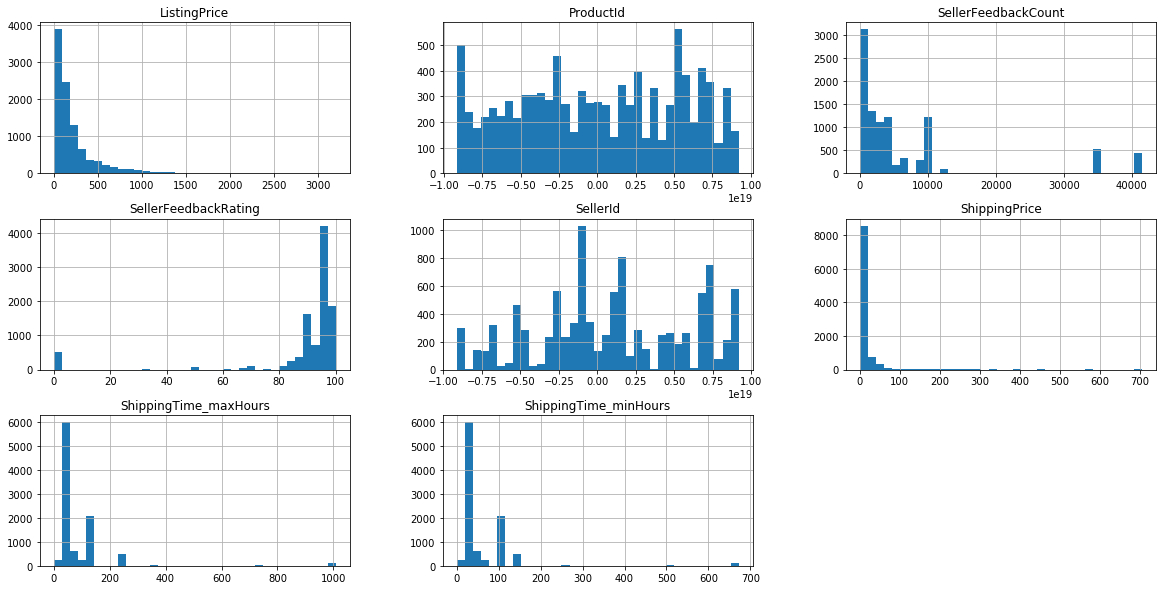

In [70]:
#PLOTTING

plt.figure()
offers2[continuousColumns2].hist(figsize=(20, 10), bins=35)

#saving the plot into a file
plt.savefig('Continuous_Features_Histograms.png')


The features have different types of distributions:

Exponential for ListingPrice and ShippingPrice.

Skewed to the right for ShippingTime_minHours and ShippingTime_maxHours

Skewed to the left (but almost exponential) for the SellerFeedbackRating.

All these features could potentially have outliers, or errors, or misinterpreted missing values.

SellerFeedbackCount could be bimodal, but not clear.
SellerId and ProductId are both unimodal.

SellerFeedbackRating presents a series of values at or around zero, isolated from the rest. It could indicate missing values? Or just relatively new sellers. Further inspection of the data is required. It is not clear why there is such a high difference between the data around zero and the rest of the data in the distribution, with mean at/around 90. Maybe the zero was used to indicate a missing value? If so, we could drop these values, or give them the value of the mean of the distribution, or drop altogether the feature if % of zero is too high (but from histogram seem only a small portion of the data).

These considerations can be added to the **Quality Data Plan** for further evaluation later.

### 6.4 BOX PLOTS

Analysis of distributions through box plots will give indications on the presence (or absence) of outliers in continuous features. It is more difficult to see the distribution, but easier to see the outliers, medians, range and interquartiles.

C:\Users\USER\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


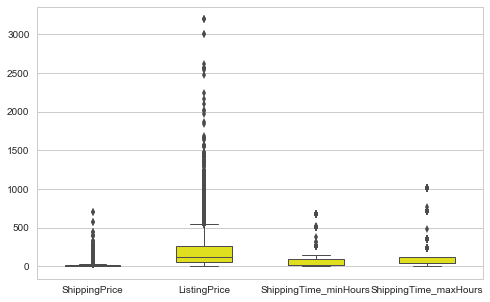

In [71]:
import seaborn as sb

plt.rc("figure", figsize=(8, 5))

sb.set_style("whitegrid")
sb.boxplot(offers2[['ShippingPrice', 
                     'ListingPrice','ShippingTime_minHours',
                     'ShippingTime_maxHours']],orient="v", fliersize=5, 
                      color='yellow',  width=0.5, linewidth=1)

#saving the plot into a file
plt.savefig('Continuous_Features_Boxplots1.png')

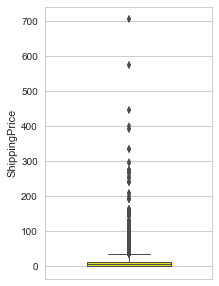

In [72]:
#PLOTTING SHIPPING PRICES IN MORE DETAILS

plt.rc("figure", figsize=(3, 5))
sb.set_style("whitegrid")
sb.boxplot(offers2['ShippingPrice'], orient="v", fliersize=5, 
                      color='yellow',  width=0.5, linewidth=1)

#saving the plot into a file
plt.savefig('Continuous_Features_Boxplots2.png')

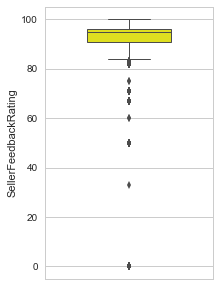

In [73]:
#PLOTTING THE OTHER CONTINUOUS FEATURES IN MORE DETAILS

plt.rc("figure", figsize=(3, 5))
sb.set_style("whitegrid")
sb.boxplot(offers2['SellerFeedbackRating'], orient="v", fliersize=5, 
                      color='yellow',  width=0.5, linewidth=1)

#saving the plot into a file
plt.savefig('Continuous_Features_Boxplots3.png')

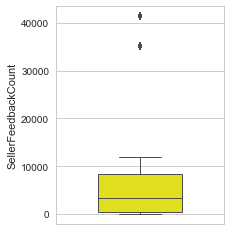

In [74]:
plt.rc("figure", figsize=(3, 4))
sb.set_style("whitegrid")
sb.boxplot(offers2['SellerFeedbackCount'],orient="v", fliersize=5, 
                      color='yellow',  width=0.5, linewidth=1)

#saving the plot into a file
plt.savefig('Continuous_Features_Boxplots4.png')

C:\Users\USER\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


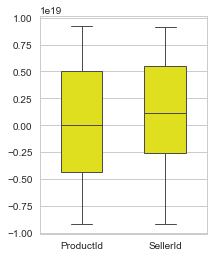

In [75]:
plt.rc("figure", figsize=(3, 4))
sb.set_style("whitegrid")
sb.boxplot(offers2[['ProductId', 'SellerId']],orient="v", fliersize=5, 
                      color='yellow',  width=0.5, linewidth=1)

#saving the plot into a file
plt.savefig('Continuous_Features_Boxplots5.png')

We can see looking at the boxplots that many features present outliers, and we should deal with them.

We take note of these in the Data Quality Plan (see file *DataQualityPlan.pdf*).

As expected, the feature SellerFeedbackRating present outliers near or at zero.
We should further investigate how many of these outliers are present, then decide if to delete them, or assign to them a specific value (maybe at the lower range of the distribution, instead of using the mean). This feature should be treated with caution as it could be important in predicting the Winner sellers.

Similar considerations should be made for the rest of the features where outliers are present, and register these on the Data Quality Plan, indicating a possible solution.

### 6.4 BAR PLOTS

Analysis of data through bar plots will give indications on the general distribution of categorical features, and they are very effective for features with a low cardinality. 

As we have been treated the binary features as categorical, we should reassign to the data a value 'Yes' for 1 and value 'No' for 0, so it will make more sense when plotted in bar plots.

In [76]:
offers2['IsWinner'] = offers2['IsWinner'].map({0 : 'No', 1 : 'Yes'})
offers2['IsFeaturedMerchant'] = offers2['IsFeaturedMerchant'].map({0 : 'No', 1 : 'Yes'})
offers2['IsFulfilledByAmazon'] = offers2['IsFulfilledByAmazon'].map({0 : 'No', 1 : 'Yes'})

#Resaving dataframe to the csv file
offers2 = offers2.to_csv("offers2.csv", index=False, index_label=False)

In [77]:
#re-reading the csv file
offers2 = pd.read_csv('offers2.csv')
offers2

,IsWinner,ProductId,TimeOfOfferChange,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,SellerFeedbackRating,SellerFeedbackCount,SellerId,ShippingPrice,ShippingTime_minHours,ShippingTime_maxHours
0,No,-4.885260e+18,2016-02-04T04:26:52.136Z,Yes,Yes,94.00,0,0,1.207140e+18,0.00,672,1008
1,Yes,-4.885260e+18,2016-02-04T04:26:52.136Z,Yes,No,107.35,95,4078,-1.789490e+18,0.00,48,72
2,No,-4.885260e+18,2016-02-04T04:26:52.136Z,Yes,No,100.46,98,478,5.452080e+18,6.99,24,48
3,No,-4.885260e+18,2016-02-04T04:26:52.136Z,Yes,No,99.24,95,4384,-2.572280e+18,11.67,24,48
4,No,-4.885260e+18,2016-02-04T04:26:52.136Z,No,No,109.48,94,105,-8.704030e+18,8.99,24,48
5,No,-4.885260e+18,2016-02-04T04:26:52.136Z,No,No,116.70,67,9,1.929050e+18,6.98,24,48
6,No,-4.885260e+18,2016-02-04T04:26:52.136Z,Yes,No,124.69,100,4601,5.657220e+18,0.00,24,48
7,No,-4.885260e+18,2016-02-04T04:26:52.136Z,Yes,No,120.08,96,1790,1.788800e+18,9.98,96,120
8,No,-4.885260e+18,2016-02-04T04:26:52.136Z,Yes,No,125.73,91,10606,-1.177410e+18,5.00,24,48
9,No,-4.885260e+18,2016-02-04T04:26:52.136Z,Yes,No,121.27,96,1790,1.788800e+18,9.98,96,120


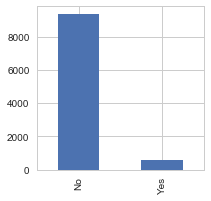

In [78]:
#PLOTTING THE CATEGORICAL FEATURES

offers2['IsWinner'].value_counts().plot(kind='bar', figsize=(3,3))

#saving the plot into a file
plt.savefig('Categorical_Features_BarPlot1Target.png')

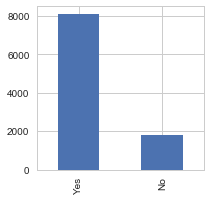

In [79]:
offers2['IsFeaturedMerchant'].value_counts().plot(kind='bar', figsize=(3,3))

#saving the plot into a file
plt.savefig('Categorical_Features_BarPlot2.png')

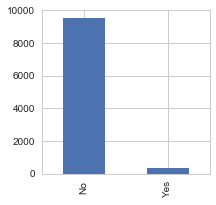

In [80]:
offers2['IsFulfilledByAmazon'].value_counts().plot(kind='bar', figsize=(3,3))

#saving the plot into a file
plt.savefig('Categorical_Features_BarPlot3.png')

The bar plots clearly define the two subsets in the various binary features. There are very few winner sellers in the data set, many featured merchants, and very little of the offers are fulfilled directly by Amazon.


### 6.5 SCATTER PLOT MATRIX - ANALYSIS OF CORRELATIONS

Analysis of correlations between a set of continuous feature in relation to the target feature is done through a scatter plot matrix.

First we select the continuous feature to use. To be effective the scatter plot matrix should not have more than 5 features and 1 target feature, as we will do here.

Continuous features for scatter plot matrix = 'SellerFeedbackRating', 'SellerFeedbackCount', 'ShippingTime_minHours', 'ShippingPrice', 'ListingPrice'.

Target feature = 'IsWinner'; data points on the single plots in the matrix will be divided into two groups:

**Green** = Yes = Winner seller

**Blues** = No = Non-winner seller

In [81]:
#CREATING A NEW DATAFRAME WITH SELECTION OF 6 FEATURES

offersScatter = offers2[['SellerFeedbackRating', 'SellerFeedbackCount',
                        'ShippingTime_minHours', 'ListingPrice', 
                        'ShippingPrice', 'IsWinner']]


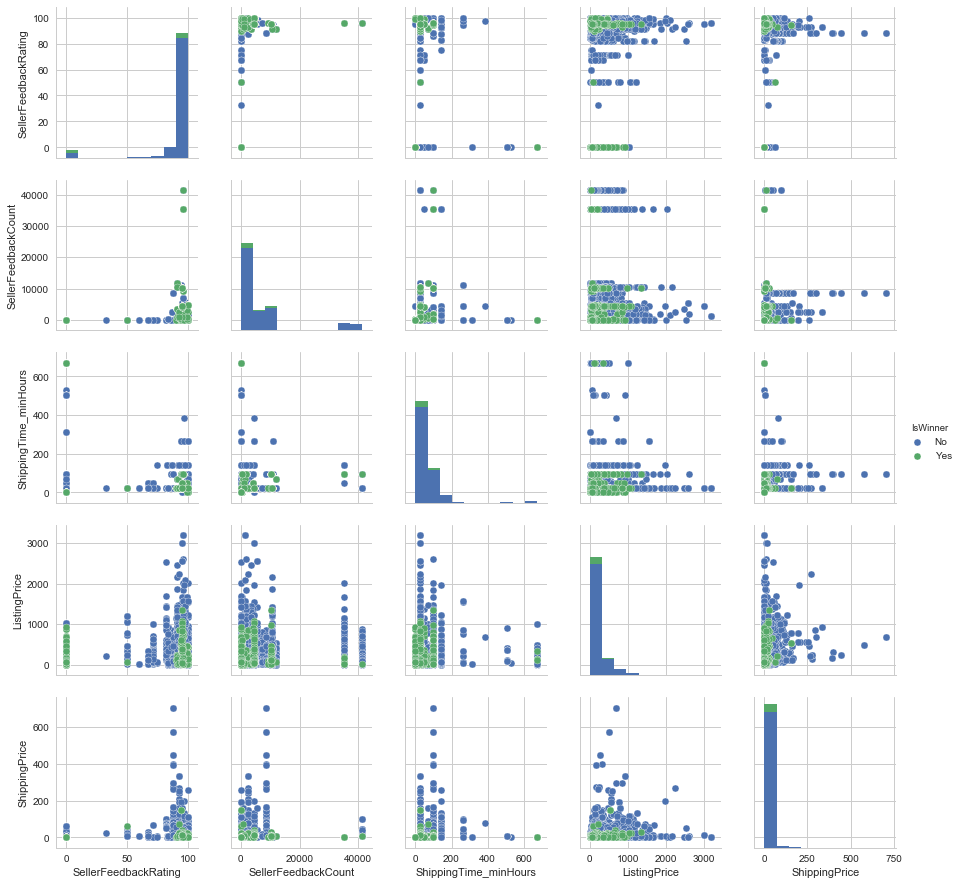

In [82]:
#PLOTTING THE MATRIX USING seaborn

sb.pairplot(offersScatter, hue='IsWinner')

#saving the matrix into a file
plt.savefig('ScatterPlot1.png')

CONSIDERATIONS

No clear correlations are seen between the descriptive features, but the division of data into winner sellers and non-winner sellers gives some clear conclusions:

Green dots concentrate in certain areas compared to blue dots. 

For instance, we can see that winner sellers have usually lower listing and shipping prices, but also higher ratings and lower minimum shipping time. No much differences were visible in rating counts.

A good portion of values for seller ratings is at zero, but as we have seen, these are all outliers and will be dealt with in next section. 

**MILESTONES 9** -*Plot histograms for all the continuous features.*

**MILESTONES 10** -*Plot box plots for all the continuous features.*

**MILESTONES 11** -*Plot bar plots for all the categorical features.*

**MILESTONES 12** -*Save all the tables, plots and initial discussion of your findings, into a single data quality report file.*

ANSWER: see file included, *DataQualityReport.pdf*.

## 7 - DATA PREPARATION - PHASE 2

### 7.1 PROBLEMS WITH DATA

MISSING VALUES

We have already identified columns with missing values, calculated % of missing values and decided to exclude 3 features from the dataset (the only features containing empty data cells or NaN) because % of missing values were higher than 50%. This was recorded in the Data Quality Plan (see file *DataQualityPlan.pdf*).

IRREGULAR CARDINALITIES

We have dealt with cardinality issues dropping those features having cardinality 1, which were constants and not useful for the prediction model.


OUTLIERS

Outliers are present in almost all the continuous features, and they should be deal in various ways, depending on the feature.

**MILESTONES 13** -*Mark down all the features where there are potential problems or data quality issues.*

ANSWER: see file included, *DataQualityPlan.pdf*.

### 7.2 PROPOSED SOLUTIONS

We have dealt with missing values dropping the features with > 30% missing values.

Some of the features could have used 0 to indicate missing values, and if so they are usually interpreted and dealt as outliers.

We have dealt with cardinality issues dropping features with cardinality = 1.

For outliers, the type of outliers (too high or too low) and the proposed strategic solutions (e.g. Clamp Transformation) are listed for each feature in the Data Quality Plan. Because the data is not normally distributed in any feature, the clamp transformations are done setting thresholds at not less than 3 standard deviations from the center of the distribution (the median, for non normally distributed features).

**MILESTONES 14** -*Propose solutions to deal with the problems identified. Explain why did you choose one solution over (potentially many) other.*

ANSWER: see file included, *DataQualityPlan.pdf*.


### 7.3 DEALING WITH OUTLIERS AND ERRORS

INSPECTING OUTLIERS IN CONTINUOUS FEATURES

In [83]:
import pandas as pd

offers2 = pd.read_csv('offers2.csv')

offersOutliers = offers2[['SellerFeedbackRating', 'SellerFeedbackCount',
                        'ShippingTime_minHours', 'ShippingTime_maxHours', 
                        'ListingPrice', 'ShippingPrice']]




In [84]:
#ShippingPrice OUTLIERS

Q1 = offersOutliers['ShippingPrice'].quantile(0.25)
Q3 = offersOutliers['ShippingPrice'].quantile(0.75)
IQR = Q3 - Q1
LOWERLIMIT = Q1 - 1.5 * IQR
UPPERLIMIT = Q3 + 1.5 * IQR

shippingPriceOut = offersOutliers[(offersOutliers.ShippingPrice > UPPERLIMIT)]

#counting number of outliers
shippingPriceOut.shape[0]

702

Having so many outliers we cannot simply delete the entries. We could transform these values. However, it is best to have a closer look at them:


In [85]:
#LISTING OUTLIERS

shippingPriceOut['ShippingPrice']

34       50.46
51       60.86
59       52.29
64       65.11
66       45.00
95       51.69
126      37.65
135      61.07
174      44.87
189      82.77
202      46.87
206      40.99
208      88.76
227      50.40
261      83.52
262      56.84
276      41.62
279      39.29
281      50.11
282      53.04
296      52.74
298      45.00
302      65.38
307      50.61
316      74.65
318      58.33
325      40.39
332      69.30
357      45.00
358      37.26
         ...  
9416     39.89
9420     67.81
9424     51.76
9464     36.38
9467     38.59
9468     50.11
9475     40.39
9483     69.30
9510     36.56
9511     39.89
9515     67.81
9519     51.76
9580     80.92
9592     58.75
9597     47.60
9616     41.62
9639     51.82
9654     49.85
9679     44.65
9686     40.39
9694     69.30
9716     48.81
9717     54.47
9730     62.67
9750     51.82
9764     38.47
9765     38.70
9766     56.51
9770    157.58
9866     44.65
Name: ShippingPrice, dtype: float64

The distribution for Shipping price is exponential, and the entries do not seem to be errors.We are not sure what to do in this case, so we do nothing.

In [86]:
#ListingPrice OUTLIERS

Q1 = offersOutliers['ListingPrice'].quantile(0.25)
Q3 = offersOutliers['ListingPrice'].quantile(0.75)
IQR = Q3 - Q1
LOWERLIMIT = Q1 - 1.5 * IQR
UPPERLIMIT = Q3 + 1.5 * IQR

listingPriceOut = offersOutliers[(offersOutliers.ListingPrice > UPPERLIMIT)]

#counting number of outliers
listingPriceOut.shape[0]

909

In [87]:
#LISTING OUTLIERS

listingPriceOut['ListingPrice']

151     2999.00
227      580.91
371      586.80
544      677.87
545     1144.03
595      556.50
597      579.28
598      627.79
599      555.76
600      768.39
601      783.07
602      951.36
618      609.99
619      880.91
620     1664.17
725      552.31
726      565.82
727      567.01
728      587.32
729      596.95
730      731.09
731      631.20
732      760.05
733      748.00
734      794.47
735      565.75
794      844.75
795      845.45
832      708.30
833      708.40
         ...   
9074     932.15
9075    1015.06
9076    1055.75
9077    1037.24
9078     902.39
9079     885.18
9080     998.92
9081    1003.48
9082    1022.34
9083    1161.13
9084    1208.14
9085    1335.94
9086    1344.16
9087    1423.27
9405     834.74
9406     853.47
9407     849.83
9408     932.15
9409    1015.06
9410    1055.75
9411    1037.24
9429    1024.98
9430     858.19
9431    1027.13
9432    1134.38
9433    1188.86
9434    1202.67
9524    1024.98
9598     581.73
9599     700.75
Name: ListingPrice, dtyp

In [88]:
#SellerFeedbackCount OUTLIERS

Q1 = offersOutliers['SellerFeedbackCount'].quantile(0.25)
Q3 = offersOutliers['SellerFeedbackCount'].quantile(0.75)
IQR = Q3 - Q1
LOWERLIMIT = Q1 - 1.5 * IQR
UPPERLIMIT = Q3 + 1.5 * IQR

SellerFeedbackCountOut = offersOutliers[(offersOutliers.SellerFeedbackCount > UPPERLIMIT)]

#counting number of outliers
SellerFeedbackCountOut.shape[0]

972

In [89]:
#LISTING OUTLIERS

SellerFeedbackCountOut['SellerFeedbackCount']

10      35264
15      41419
20      35264
29      41419
38      35264
42      41419
45      41419
56      35264
67      35264
73      41419
78      35264
88      41419
97      35264
106     41419
119     35264
129     41419
137     35264
143     41419
146     41419
152     35264
160     41419
173     35264
175     41419
196     35264
199     41419
218     41419
221     35264
228     35264
236     41419
248     35264
        ...  
9594    41420
9604    35272
9612    41420
9614    41420
9625    35272
9631    41420
9647    41420
9662    35272
9676    41420
9683    35272
9687    41420
9702    35272
9705    41420
9720    35272
9724    41420
9736    35272
9742    41420
9760    35272
9765    41420
9776    35272
9785    35272
9789    41420
9799    35272
9815    35272
9836    35272
9845    41420
9850    35272
9863    41420
9871    35272
9883    41420
Name: SellerFeedbackCount, dtype: int64

This is strange as this feature has cardinality = 123, so it is suspect to have only 2 entries and so much above the mean for the feature. Still, because so many of them, we are not sure what to do with them. Should we delete them? We don't think so as we would loose information of 972 entries. More information would be needed, maybe talking to the person that gave us the raw data in Amazon.

In [90]:
#SellerFeedbackRating OUTLIERS

Q1 = offersOutliers['SellerFeedbackRating'].quantile(0.25)
Q3 = offersOutliers['SellerFeedbackRating'].quantile(0.75)
IQR = Q3 - Q1
LOWERLIMIT = Q1 - 1.5 * IQR
UPPERLIMIT = Q3 + 1.5 * IQR

SellerFeedbackRatingOut = offersOutliers[(offersOutliers.SellerFeedbackRating < LOWERLIMIT)]

#counting number of outliers
SellerFeedbackRatingOut.shape[0]

854

In [91]:
#LISTING OUTLIERS

SellerFeedbackRatingOut['SellerFeedbackRating']

0        0
5       67
21       0
34      82
51       0
54      71
64      82
70       0
77       0
95      82
96       0
102      0
114     71
116      0
122     71
136      0
142     71
153      0
157      0
169     50
170      0
190      0
193     71
198      0
204      0
206      0
209      0
211      0
227     82
246      0
        ..
9508     0
9513     0
9522    50
9524     0
9528     0
9545     0
9565     0
9571    67
9587     0
9622    67
9639    82
9652     0
9664     0
9677     0
9680     0
9704     0
9713    50
9717    82
9721     0
9730     0
9733    67
9750    82
9751     0
9793     0
9811     0
9830     0
9852     0
9864     0
9870     0
9884     0
Name: SellerFeedbackRating, dtype: int64

Again, not sure what to do, are the zeros missing values? Are they real value for people with zero rating? We don't know what to do so we do nothing, too many  outliers, removing them would change distribution.

In [92]:
#SellerFeedbackRating OUTLIERS

Q1 = offersOutliers['ShippingTime_minHours'].quantile(0.25)
Q3 = offersOutliers['ShippingTime_minHours'].quantile(0.75)
IQR = Q3 - Q1
LOWERLIMIT = Q1 - 1.5 * IQR
UPPERLIMIT = Q3 + 1.5 * IQR

ShippingTime_minHoursOut = offersOutliers[(offersOutliers.ShippingTime_minHours > UPPERLIMIT)]

#counting number of outliers
ShippingTime_minHoursOut.shape[0]

168

In [93]:
#LISTING OUTLIERS

ShippingTime_minHoursOut['ShippingTime_minHours']

0       672
21      672
66      264
96      672
170     672
190     672
198     504
245     264
246     672
298     264
319     672
380     504
393     672
474     672
549     672
604     672
608     504
678     672
716     672
744     312
782     672
815     264
816     672
951     672
971     672
1008    672
1028    672
1048    672
1068    672
1101    672
       ... 
8039    672
8066    672
8076    672
8198    672
8259    672
8296    672
8392    672
8478    672
8575    672
8799    672
8813    672
8828    264
8905    672
8968    672
8985    672
9035    672
9039    504
9110    672
9195    672
9211    672
9366    672
9414    672
9418    504
9469    672
9508    672
9513    504
9587    672
9680    672
9751    672
9811    672
Name: ShippingTime_minHours, dtype: int64

In this case, because thenumber of outliers is smaller, we could consider to delete the outliers, but the cardinality of this feature is low, so not sure what to do. We do nothing.

In [94]:
#SellerFeedbackRating OUTLIERS

Q1 = offersOutliers['ShippingTime_maxHours'].quantile(0.25)
Q3 = offersOutliers['ShippingTime_maxHours'].quantile(0.75)
IQR = Q3 - Q1
LOWERLIMIT = Q1 - 1.5 * IQR
UPPERLIMIT = Q3 + 1.5 * IQR

ShippingTime_maxHoursOut = offersOutliers[(offersOutliers.ShippingTime_maxHours > UPPERLIMIT)]

#counting number of outliers
ShippingTime_maxHoursOut.shape[0]

664

In [95]:
#LISTING OUTLIERS

ShippingTime_maxHoursOut['ShippingTime_maxHours']

0       1008
21      1008
31       240
48       240
50       240
57       240
66       360
74       240
93       240
96      1008
118      240
154      240
170     1008
181      240
185      240
190     1008
198      720
207      240
231      240
245      360
246     1008
264      240
279      240
298      360
316      240
319     1008
359      240
373      240
377      240
380      720
        ... 
9373     240
9374     240
9377     240
9414    1008
9415     240
9418     720
9424     240
9454     240
9467     240
9469    1008
9508    1008
9510     240
9513     720
9519     240
9542     240
9543     240
9587    1008
9592     240
9619     240
9680    1008
9698     240
9699     240
9710     240
9716     240
9751    1008
9757     240
9764     240
9795     240
9811    1008
9837     240
Name: ShippingTime_maxHours, dtype: int64

Same considerations as above for previous features.

Because we have done nothing to the dataset, we don't need to save into a new csv file. We have already done some transformations before (ex: dealing with cardinalitites and missing values).

**MILESTONES 15** -*Apply your solutions to obtain a new CSV file where the data quality issues identified were addressed. Save the new CSV file with a self_explanatory name. Save the data quality plan to a single file (as a table or structured text).*

ANSWER: see files included, *DataQualityPlan.pdf* and *offers2.csv*.

## 8 - EXPLORING CORRELATIONS

See in previous sections, Scatter Plot Matrix and considerations.

**MILESTONES 16** -*Choose a subset of features you find promising and plot pairwise feature interactions (e.g., continuous-continuous feature plot or continuous-categorical plots or correlation plots). Explain your choices.*

ANSWER: see above.

**MILESTONES 17** -*Discuss your findings from the plots above. Do you find any features or feature combinations that are indicative of the target outcome (IsWinner)? Explain in plain words (a short paragraph) the story of your findings so far.*

ANSWER: see above.

**Conclusions: winner sellers have usually lower listing and shipping prices, but also higher ratings and lower minimum shipping time. No much differences were visible in rating counts.**